Import Librairies

In [1]:
import numpy as np
import pandas as pd

Loading the Data

In [2]:
load_data_inputs_train=pd.read_csv('loan_data_inputs_train.csv', index_col=0)
load_data_targets_train=pd.read_csv('loan_data_targets_train.csv',index_col=0,header=None)
load_data_inputs_test=pd.read_csv('loan_data_inputs_test.csv',index_col=0)
load_data_targets_test=pd.read_csv('loan_data_targets_test.csv',index_col=0,header=None)

/Users/sushmita/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
loan_data_backup = pd.read_csv('loan_data_2015.csv')

/Users/sushmita/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (19,55) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Explore Data

In [4]:
Load_DS = loan_data_backup.copy()

In [5]:
pd.options.display.max_columns = None

In [6]:
Load_DS.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,68444620,73334399,35000,35000,35000.0,60 months,11.99,778.38,C,C1,Foreign Service Officer,10+ years,MORTGAGE,128000.0,Source Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,NaN,home_improvement,Home improvement,200xx,DC,6.46,0.0,Feb-90,0.0,46.0,NaN,17.0,0.0,14277,27.4,46.0,w,35000.0,35000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Jan-16,Jan-16,0.0,56.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,321.0,146867.0,1.0,11.0,0.0,0.0,28.0,35367.0,49.3,0.0,1.0,5020.0,40.1,52200.0,1.0,4.0,0.0
1,68547583,73437441,8650,8650,8650.0,36 months,5.32,260.50,A,A1,Associate Consultant,< 1 year,MORTGAGE,100000.0,Not Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,462xx,IN,7.28,0.0,Jul-01,0.0,NaN,NaN,15.0,0.0,7158,26.7,24.0,w,8650.0,8650.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Jan-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,165450.0,0.0,1.0,1.0,1.0,11.0,24041.0,88.8,0.0,3.0,3081.0,57.9,26800.0,1.0,0.0,5.0
2,67849662,72708407,4225,4225,4225.0,36 months,14.85,146.16,C,C5,mechanic,5 years,RENT,35000.0,Source Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,672xx,KS,15.22,2.0,Jul-11,0.0,18.0,NaN,6.0,0.0,1058,24.6,6.0,w,4225.0,4225.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Jan-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,4888.0,0.0,1.0,0.0,0.0,47.0,3830.0,21.9,0.0,0.0,367.0,22.4,4300.0,0.0,0.0,0.0
3,68506885,73396712,10000,10000,10000.0,60 months,11.99,222.40,C,C1,CARDIOVASCULAR TECH,10+ years,RENT,42500.0,Not Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,460xx,IN,31.04,0.0,Dec-98,1.0,NaN,NaN,10.0,0.0,5812,40.9,23.0,w,10000.0,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Jan-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,41166.0,1.0,3.0,0.0,2.0,13.0,35354.0,75.5,1.0,1.0,3118.0,67.4,14200.0,1.0,1.0,1.0
4,68341763,72928789,20000,20000,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,NaN,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-00,0.0,NaN,NaN,6.0,0.0,7869,56.2,18.0,w,20000.0,20000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Jan-16,Dec-15,0.0,NaN,1,JOINT,71000.0,13.85,Not Verified,0.0,0.0,189699.0,0.0,1.0,0.0,4.0,19.0,10827.0,72.8,0.0,2.0,2081.0,64.7,14000.0,2.0,5.0,1.0


In [7]:
Load_DS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421094 entries, 0 to 421093
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           421094 non-null  int64  
 1   member_id                    421094 non-null  int64  
 2   loan_amnt                    421094 non-null  int64  
 3   funded_amnt                  421094 non-null  int64  
 4   funded_amnt_inv              421094 non-null  float64
 5   term                         421094 non-null  object 
 6   int_rate                     421094 non-null  float64
 7   installment                  421094 non-null  float64
 8   grade                        421094 non-null  object 
 9   sub_grade                    421094 non-null  object 
 10  emp_title                    397220 non-null  object 
 11  emp_length                   397277 non-null  object 
 12  home_ownership               421094 non-null  object 
 13 

Population Stability Index: Preprocessing

General Preprocessing

Preprocessing few Continuous variables

In [8]:
Load_DS['emp_length'].unique()

array(['10+ years', '< 1 year', '5 years', '3 years', '4 years', nan,
       '2 years', '8 years', '9 years', '1 year', '6 years', '7 years'],
      dtype=object)

In [9]:
Load_DS['emp_length_int']=Load_DS['emp_length'].str.replace('\+ years','')

Load_DS['emp_length_int']=Load_DS['emp_length_int'].str.replace('< 1 year',str(0))

Load_DS['emp_length_int']=Load_DS['emp_length_int'].str.replace('n/a',str(0))

Load_DS['emp_length_int']=Load_DS['emp_length_int'].str.replace('years','')

Load_DS['emp_length_int']=Load_DS['emp_length_int'].str.replace('year','')

In [10]:
type(Load_DS['emp_length_int'][0])

str

In [11]:
Load_DS['emp_length_int'] =  pd.to_numeric(Load_DS['emp_length_int'])

In [12]:
type(Load_DS['emp_length_int'][0])

numpy.float64

In [13]:
Load_DS

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int
0,68444620,73334399,35000,35000,35000.0,60 months,11.99,778.38,C,C1,Foreign Service Officer,10+ years,MORTGAGE,128000.0,Source Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,NaN,home_improvement,Home improvement,200xx,DC,6.46,0.0,Feb-90,0.0,46.0,NaN,17.0,0.0,14277,27.4,46.0,w,35000.00,35000.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,NaN,0.00,Jan-16,Jan-16,0.0,56.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,321.0,146867.0,1.0,11.0,0.0,0.0,28.0,35367.0,49.3,0.0,1.0,5020.0,40.1,52200.0,1.0,4.0,0.0,10.0
1,68547583,73437441,8650,8650,8650.0,36 months,5.32,260.50,A,A1,Associate Consultant,< 1 year,MORTGAGE,100000.0,Not Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,462xx,IN,7.28,0.0,Jul-01,0.0,NaN,NaN,15.0,0.0,7158,26.7,24.0,w,8650.00,8650.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,NaN,0.00,Jan-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,165450.0,0.0,1.0,1.0,1.0,11.0,24041.0,88.8,0.0,3.0,3081.0,57.9,26800.0,1.0,0.0,5.0,0.0
2,67849662,72708407,4225,4225,4225.0,36 months,14.85,146.16,C,C5,mechanic,5 years,RENT,35000.0,Source Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,672xx,KS,15.22,2.0,Jul-11,0.0,18.0,NaN,6.0,0.0,1058,24.6,6.0,w,4225.00,4225.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,NaN,0.00,Jan-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,4888.0,0.0,1.0,0.0,0.0,47.0,3830.0,21.9,0.0,0.0,367.0,22.4,4300.0,0.0,0.0,0.0,5.0
3,68506885,73396712,10000,10000,10000.0,60 months,11.99,222.40,C,C1,CARDIOVASCULAR TECH,10+ years,RENT,42500.0,Not Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,460xx,IN,31.04,0.0,Dec-98,1.0,NaN,NaN,10.0,0.0,5812,40.9,23.0,w,10000.00,10000.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,NaN,0.00,Jan-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,41166.0,1.0,3.0,0.0,2.0,13.0,35354.0,75.5,1.0,1.0,3118.0,67.4,14200.0,1.0,1.0,1.0,10.0
4,68341763,72928789,20000,20000,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,NaN,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-00,0.0,NaN,NaN,6.0,0.0,7869,56.2,18.0,w,20000.00,20000.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,NaN,0.00,Jan-16,Dec-15,0.0,NaN,1,JOINT,71000.0,13.85,Not Verified,0.0,0.0,189699.0,0.0,1.0,0.0,4.0,19.0,10827.0,72.8,0.0,2.0,2081.0,64.7,14000.0,2.0,5.0,1.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421089,36371250,39102635,10000,10000,10000.0,36 months,11.99,332.10,B,B5,Office Assistant,8 years,RENT,31000.0,Verified,Jan-15,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,905xx,CA,28.69,0.0,Sep-04,0.0,NaN,77.

In [14]:
Load_DS['term'].unique()

array([' 60 months', ' 36 months'], dtype=object)

In [15]:
Load_DS['term_int']=Load_DS['term'].str.replace('months','')

In [16]:
type(Load_DS['term_int'][0])

str

In [17]:
Load_DS['term_int']=pd.to_numeric(Load_DS['term_int'])

In [18]:
type(Load_DS['term_int'][0])

numpy.int64

In [19]:
Load_DS['earliest_cr_line']

0         Feb-90
1         Jul-01
2         Jul-11
3         Dec-98
4         Aug-00
           ...  
421089    Sep-04
421090    Mar-74
421091    Sep-03
421092    Oct-03
421093    Dec-01
Name: earliest_cr_line, Length: 421094, dtype: object

In [20]:
Load_DS['earliest_cr_line_date']=pd.to_datetime(Load_DS['earliest_cr_line'], format='%b-%y')

In [21]:
Load_DS['earliest_cr_line_date']

0        1990-02-01
1        2001-07-01
2        2011-07-01
3        1998-12-01
4        2000-08-01
            ...    
421089   2004-09-01
421090   1974-03-01
421091   2003-09-01
421092   2003-10-01
421093   2001-12-01
Name: earliest_cr_line_date, Length: 421094, dtype: datetime64[ns]

In [22]:
pd.to_datetime('2017-12-01')-Load_DS['earliest_cr_line_date']

0        10165 days
1         5997 days
2         2345 days
3         6940 days
4         6331 days
            ...    
421089    4839 days
421090   15981 days
421091    5205 days
421092    5175 days
421093    5844 days
Name: earliest_cr_line_date, Length: 421094, dtype: timedelta64[ns]

In [23]:
Load_DS['mths_since_earliest_cr_line']=round(pd.to_numeric((pd.to_datetime('2017-12-01')-Load_DS['earliest_cr_line_date'])/np.timedelta64(1,'M')))

In [24]:
Load_DS['mths_since_earliest_cr_line'].describe()

count    421094.000000
mean        227.354876
std          98.123989
min        -612.000000
25%         167.000000
50%         212.000000
75%         277.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [25]:
Load_DS.loc[: , ['earliest_cr_line','earliest_cr_line_date','mths_since_earliest_cr_line']][Load_DS['mths_since_earliest_cr_line']<0]

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
254,Jan-57,2057-01-01,-469.0
618,Aug-64,2064-08-01,-560.0
648,Jul-68,2068-07-01,-607.0
1808,Jan-65,2065-01-01,-565.0
2583,Sep-64,2064-09-01,-561.0
...,...,...,...
418890,Jun-68,2068-06-01,-606.0
420450,Jan-66,2066-01-01,-577.0
420642,Sep-68,2068-09-01,-609.0
420794,Sep-65,2065-09-01,-573.0


In [26]:
Load_DS['mths_since_earliest_cr_line'][Load_DS['mths_since_earliest_cr_line'] < 0 ]=Load_DS['mths_since_earliest_cr_line'].max()

<ipython-input-26-7df96f737e66>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Load_DS['mths_since_earliest_cr_line'][Load_DS['mths_since_earliest_cr_line'] < 0 ]=Load_DS['mths_since_earliest_cr_line'].max()


In [27]:
(Load_DS['mths_since_earliest_cr_line']).describe()

count    421094.000000
mean        230.471220
std          90.827636
min          61.000000
25%         168.000000
50%         212.000000
75%         278.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [28]:
Load_DS['issue_d']

0         Dec-15
1         Dec-15
2         Dec-15
3         Dec-15
4         Dec-15
           ...  
421089    Jan-15
421090    Jan-15
421091    Jan-15
421092    Jan-15
421093    Jan-15
Name: issue_d, Length: 421094, dtype: object

In [29]:
Load_DS['issue_date']=pd.to_datetime(Load_DS['issue_d'],format='%b-%y')

In [30]:
type(Load_DS['issue_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [31]:
pd.to_datetime('2019-12-01')-Load_DS['issue_date']

0        1461 days
1        1461 days
2        1461 days
3        1461 days
4        1461 days
            ...   
421089   1795 days
421090   1795 days
421091   1795 days
421092   1795 days
421093   1795 days
Name: issue_date, Length: 421094, dtype: timedelta64[ns]

In [32]:
Load_DS['mths_since_issued_date']=round(pd.to_numeric((pd.to_datetime('2019-12-01')-Load_DS['issue_date'])/np.timedelta64(1,'M')))

In [33]:
Load_DS['mths_since_issued_date'].describe()

count    421094.000000
mean         53.044629
std           3.458162
min          48.000000
25%          50.000000
50%          53.000000
75%          56.000000
max          59.000000
Name: mths_since_issued_date, dtype: float64

In [34]:
min(Load_DS['mths_since_issued_date'])

48.0

In [35]:
Load_DS['term_int'].describe()

count    421094.000000
mean         43.860782
std          11.263533
min          36.000000
25%          36.000000
50%          36.000000
75%          60.000000
max          60.000000
Name: term_int, dtype: float64

In [36]:
min(Load_DS['term_int'])

36

In [37]:
#Load_DS['mths_since_earliest_cr_line_fac']=Load_DS['mths_since_earliest_cr_line'].astype(float)
Load_DS['mths_since_earliest_cr_line'].describe()

count    421094.000000
mean        230.471220
std          90.827636
min          61.000000
25%         168.000000
50%         212.000000
75%         278.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [38]:
Load_DS['delinq_2yrs']=Load_DS['delinq_2yrs'].astype(float)

In [39]:
Load_DS['delinq_2yrs'].describe()

count    421094.000000
mean          0.347397
std           0.927696
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          39.000000
Name: delinq_2yrs, dtype: float64

In [40]:
Load_DS['mths_since_earliest_cr_line'].describe()

count    421094.000000
mean        230.471220
std          90.827636
min          61.000000
25%         168.000000
50%         212.000000
75%         278.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

PREPROCESSING MISSING DATA

In [41]:
pd.get_dummies(Load_DS['grade'],prefix='grade',prefix_sep=':')

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G
0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
421089,0,1,0,0,0,0,0
421090,0,1,0,0,0,0,0
421091,0,0,0,1,0,0,0
421092,0,0,0,0,1,0,0


In [42]:
Load_dumies_Data=[pd.get_dummies(Load_DS['grade'],prefix='grade',prefix_sep=':'),
                 pd.get_dummies(Load_DS['sub_grade'],prefix='sub_grade',prefix_sep=':'),
                 pd.get_dummies(Load_DS['home_ownership'],prefix='home_ownership',prefix_sep=':'),
                 pd.get_dummies(Load_DS['verification_status'],prefix='verification_status',prefix_sep=':'),
                 pd.get_dummies(Load_DS['loan_status'],prefix='loan_status',prefix_sep=':'),
                 pd.get_dummies(Load_DS['purpose'],prefix='purpose',prefix_sep=':'),
                 pd.get_dummies(Load_DS['addr_state'],prefix='addr_state',prefix_sep=':'),
                 pd.get_dummies(Load_DS['initial_list_status'],prefix='initial_list_status',prefix_sep=':')]

In [43]:
Load_dumies_Data=pd.concat(Load_dumies_Data, axis=1)

In [44]:
Load_dumies_Data

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Issued,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:ND,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421089,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
421090,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,

In [45]:
type(Load_dumies_Data)

pandas.core.frame.DataFrame

In [46]:
Load_DS=pd.concat([Load_DS,Load_dumies_Data], axis=1)

In [47]:
Load_DS.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

MISSING VALUES

In [48]:
Load_DS.isnull()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,term_int,earliest_cr_line_date,mths_since_earliest_cr_line,issue_date,mths_since_issued_date,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Issued,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:ND,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [49]:
pd.options.display.max_rows= None

In [50]:
Load_DS.isnull().sum()

id                                          0
member_id                                   0
loan_amnt                                   0
funded_amnt                                 0
funded_amnt_inv                             0
term                                        0
int_rate                                    0
installment                                 0
grade                                       0
sub_grade                                   0
emp_title                               23874
emp_length                              23817
home_ownership                              0
annual_inc                                  0
verification_status                         0
issue_d                                     0
loan_status                                 0
pymnt_plan                                  0
url                                         0
desc                                   421049
purpose                                     0
title                             

In [51]:
pd.options.display.max_rows =100

In [52]:
Load_DS['total_rev_hi_lim'].fillna(Load_DS['funded_amnt'], inplace= True)

In [53]:
Load_DS['total_rev_hi_lim'].isnull().sum()

0

In [54]:
Load_DS['annual_inc'].fillna(Load_DS['annual_inc'].mean(), inplace= True)

In [55]:
Load_DS['annual_inc'].isnull().sum()

0

In [56]:
Load_DS['mths_since_earliest_cr_line'].fillna('0',inplace= True)

In [57]:
Load_DS['mths_since_earliest_cr_line'].isnull().sum()

0

In [58]:
Load_DS['acc_now_delinq'].fillna('0',inplace=True)

In [59]:
Load_DS['acc_now_delinq'].isnull().sum()

0

In [60]:
Load_DS['total_acc'].fillna('0',inplace=True)

In [61]:
Load_DS['pub_rec'].fillna('0',inplace=True)
Load_DS['open_acc'].fillna('0',inplace=True)
Load_DS['inq_last_6mths'].fillna('0',inplace=True)
Load_DS['delinq_2yrs'].fillna('0',inplace=True)
Load_DS['emp_length_int'].fillna('0',inplace=True)

PD(PROBABLITY OF DEFAULT)

In [62]:
Load_DS['loan_status'].unique()

array(['Issued', 'Current', 'Fully Paid', 'In Grace Period',
       'Late (16-30 days)', 'Late (31-120 days)', 'Charged Off',
       'Default'], dtype=object)

In [63]:
Load_DS['loan_status'].value_counts()

Current               377553
Fully Paid             22984
Issued                  8460
Late (31-120 days)      4691
In Grace Period         3107
Charged Off             2773
Late (16-30 days)       1139
Default                  387
Name: loan_status, dtype: int64

In [64]:
Load_DS['loan_status'].value_counts()/Load_DS['loan_status'].count()

Current               0.896600
Fully Paid            0.054582
Issued                0.020091
Late (31-120 days)    0.011140
In Grace Period       0.007378
Charged Off           0.006585
Late (16-30 days)     0.002705
Default               0.000919
Name: loan_status, dtype: float64

In [65]:
Load_DS['good_bad']=np.where(Load_DS['loan_status'].isin(['Charged Off','Default','Does not meet the credit policy. Status:Charged Off','Late (31-120 days)']),0,1)

In [66]:
Load_DS['good_bad']

0         1
1         1
2         1
3         1
4         1
         ..
421089    1
421090    1
421091    1
421092    1
421093    1
Name: good_bad, Length: 421094, dtype: int64

Spliting of Data

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
#train_test_split(Load_DS.drop('good_bad', axis = 1), Load_DS['good_bad'])

In [69]:
#load_ds_input_train,load_ds_input_test,load_ds_targets_train,load_ds_targets_test=train_test_split(Load_DS.drop('good_bad', axis = 1), Load_DS['good_bad'])

In [70]:
#load_ds_input_train.shape

In [71]:
#load_ds_targets_train.shape

In [72]:
#load_ds_input_test.shape

In [73]:
#load_ds_targets_test.shape

In [74]:
#load_ds_input_train,load_ds_input_test,load_ds_targets_train,load_ds_targets_test=train_test_split(Load_DS.drop('good_bad', axis = 1), Load_DS['good_bad'],test_size=0.2,random_state=42)

In [75]:
#load_ds_input_train.shape

In [76]:
#load_ds_targets_train.shape

In [77]:
#load_ds_input_test.shape

In [78]:
#load_ds_targets_test.shape

DATA PREPARATION

In [79]:
df_inputs_prepr = Load_DS.drop('good_bad', axis = 1)
df_targets_prepr = Load_DS['good_bad']

#df_inputs_prepr = load_ds_input_test
#df_targets_prepr = load_ds_targets_test

In [80]:
df_inputs_prepr['grade'].unique()

array(['C', 'A', 'B', 'F', 'D', 'E', 'G'], dtype=object)

In [81]:
df1= pd.concat([df_inputs_prepr['grade'], df_targets_prepr],axis=1)
df1.head()

,grade,good_bad
0,C,1
1,A,1
2,C,1
3,C,1
4,B,1


In [82]:
df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].count()

,grade,good_bad
0,A,73335
1,B,117606
2,C,120567
3,D,62654
4,E,34948
5,F,9817
6,G,2167


In [83]:
df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].mean()

,grade,good_bad
0,A,0.996359
1,B,0.991097
2,C,0.982541
3,D,0.967488
4,E,0.956936
5,F,0.930529
6,G,0.904015


In [84]:
df1=pd.concat([df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].count(),
             df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].mean()],axis=1)

In [85]:
df1

,grade,good_bad,grade,good_bad
0,A,73335,A,0.996359
1,B,117606,B,0.991097
2,C,120567,C,0.982541
3,D,62654,D,0.967488
4,E,34948,E,0.956936
5,F,9817,F,0.930529
6,G,2167,G,0.904015


In [86]:
df1=df1.iloc[:,[0,1,3]]
df1

,grade,good_bad,good_bad
0,A,73335,0.996359
1,B,117606,0.991097
2,C,120567,0.982541
3,D,62654,0.967488
4,E,34948,0.956936
5,F,9817,0.930529
6,G,2167,0.904015


In [87]:
df1.columns=[df1.columns.values[0],'n_obs','prop_good']

In [88]:
df1

,grade,n_obs,prop_good
0,A,73335,0.996359
1,B,117606,0.991097
2,C,120567,0.982541
3,D,62654,0.967488
4,E,34948,0.956936
5,F,9817,0.930529
6,G,2167,0.904015


In [89]:
df1['prop_n_obs']=df1['n_obs']/df1['n_obs'].sum()

In [90]:
df1

,grade,n_obs,prop_good,prop_n_obs
0,A,73335,0.996359,0.174154
1,B,117606,0.991097,0.279287
2,C,120567,0.982541,0.286318
3,D,62654,0.967488,0.148789
4,E,34948,0.956936,0.082993
5,F,9817,0.930529,0.023313
6,G,2167,0.904015,0.005146


In [91]:
#calculating the number of good varriables and bad varrirables

df1['n_good']=df1['prop_good']*df1['n_obs']
df1['n_bad']=(1-df1['prop_good'])*df1['n_obs']
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad
0,A,73335,0.996359,0.174154,73068.0,267.0
1,B,117606,0.991097,0.279287,116559.0,1047.0
2,C,120567,0.982541,0.286318,118462.0,2105.0
3,D,62654,0.967488,0.148789,60617.0,2037.0
4,E,34948,0.956936,0.082993,33443.0,1505.0
5,F,9817,0.930529,0.023313,9135.0,682.0
6,G,2167,0.904015,0.005146,1959.0,208.0


In [92]:
df1['prop_n_good']=df1['n_good']/df1['n_good'].sum()
df1['prop_n_bad']=df1['n_bad']/df1['n_good'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad
0,A,73335,0.996359,0.174154,73068.0,267.0,0.176816,0.000646
1,B,117606,0.991097,0.279287,116559.0,1047.0,0.282059,0.002534
2,C,120567,0.982541,0.286318,118462.0,2105.0,0.286664,0.005094
3,D,62654,0.967488,0.148789,60617.0,2037.0,0.146686,0.004929
4,E,34948,0.956936,0.082993,33443.0,1505.0,0.080928,0.003642
5,F,9817,0.930529,0.023313,9135.0,682.0,0.022106,0.001650
6,G,2167,0.904015,0.005146,1959.0,208.0,0.004741,0.000503


In [93]:
df1['WoE']=np.log(df1['prop_n_good']/df1['prop_n_bad'])
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,A,73335,0.996359,0.174154,73068.0,267.0,0.176816,0.000646,5.611897
1,B,117606,0.991097,0.279287,116559.0,1047.0,0.282059,0.002534,4.712469
2,C,120567,0.982541,0.286318,118462.0,2105.0,0.286664,0.005094,4.030277
3,D,62654,0.967488,0.148789,60617.0,2037.0,0.146686,0.004929,3.393097
4,E,34948,0.956936,0.082993,33443.0,1505.0,0.080928,0.003642,3.101050
5,F,9817,0.930529,0.023313,9135.0,682.0,0.022106,0.001650,2.594839
6,G,2167,0.904015,0.005146,1959.0,208.0,0.004741,0.000503,2.242651


In [94]:
df1= df1.sort_values(['WoE'])
df1=df1.reset_index(drop=True)
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,G,2167,0.904015,0.005146,1959.0,208.0,0.004741,0.000503,2.242651
1,F,9817,0.930529,0.023313,9135.0,682.0,0.022106,0.001650,2.594839
2,E,34948,0.956936,0.082993,33443.0,1505.0,0.080928,0.003642,3.101050
3,D,62654,0.967488,0.148789,60617.0,2037.0,0.146686,0.004929,3.393097
4,C,120567,0.982541,0.286318,118462.0,2105.0,0.286664,0.005094,4.030277
5,B,117606,0.991097,0.279287,116559.0,1047.0,0.282059,0.002534,4.712469
6,A,73335,0.996359,0.174154,73068.0,267.0,0.176816,0.000646,5.611897


In [95]:
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
df1['diff_WoE']=df1['WoE'].diff().abs()

In [96]:
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,G,2167,0.904015,0.005146,1959.0,208.0,0.004741,0.000503,2.242651,NaN,NaN
1,F,9817,0.930529,0.023313,9135.0,682.0,0.022106,0.001650,2.594839,0.026514,0.352187
2,E,34948,0.956936,0.082993,33443.0,1505.0,0.080928,0.003642,3.101050,0.026407,0.506211
3,D,62654,0.967488,0.148789,60617.0,2037.0,0.146686,0.004929,3.393097,0.010552,0.292048
4,C,120567,0.982541,0.286318,118462.0,2105.0,0.286664,0.005094,4.030277,0.015053,0.637180
5,B,117606,0.991097,0.279287,116559.0,1047.0,0.282059,0.002534,4.712469,0.008557,0.682192
6,A,73335,0.996359,0.174154,73068.0,267.0,0.176816,0.000646,5.611897,0.005262,0.899428


In [97]:
df1['IV'] = df1['prop_n_good'] - df1['prop_n_bad']*df1['WoE']
df1['IV']=df1['IV'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2167,0.904015,0.005146,1959.0,208.0,0.004741,0.000503,2.242651,NaN,NaN,0.930474
1,F,9817,0.930529,0.023313,9135.0,682.0,0.022106,0.001650,2.594839,0.026514,0.352187,0.930474
2,E,34948,0.956936,0.082993,33443.0,1505.0,0.080928,0.003642,3.101050,0.026407,0.506211,0.930474
3,D,62654,0.967488,0.148789,60617.0,2037.0,0.146686,0.004929,3.393097,0.010552,0.292048,0.930474
4,C,120567,0.982541,0.286318,118462.0,2105.0,0.286664,0.005094,4.030277,0.015053,0.637180,0.930474
5,B,117606,0.991097,0.279287,116559.0,1047.0,0.282059,0.002534,4.712469,0.008557,0.682192,0.930474
6,A,73335,0.996359,0.174154,73068.0,267.0,0.176816,0.000646,5.611897,0.005262,0.899428,0.930474


In [98]:
def woe_discrete(df,discrete_variable_name,good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name],good_bad_variable_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].count(),
                   df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].mean()],axis=1)
    df= df.iloc[:,[0,1,3]]
    df.columns=[df1.columns.values[0],'n_obs','prop_good']
    df['prop_n_obs']=df['n_obs']/df['n_obs'].sum()
    df['n_good']=df['prop_good']*df['n_obs']
    df['n_bad']=(1-df['prop_good'])*df['n_obs']
    df['prop_n_good']=df['n_good']/df['n_good'].sum()
    df['prop_n_bad']=df['n_bad']/df['n_good'].sum()
    df['WoE']=np.log(df['prop_n_good']/df['prop_n_bad'])
    df= df.sort_values(['WoE'])
    df=df.reset_index(drop=True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE']=df['WoE'].diff().abs()
    df['IV'] = df['prop_n_good'] - df['prop_n_bad']*df['WoE']
    df['IV']=df['IV'].sum()
    return df

In [99]:
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2167,0.904015,0.005146,1959.0,208.0,0.004741,0.000503,2.242651,NaN,NaN,0.930474
1,F,9817,0.930529,0.023313,9135.0,682.0,0.022106,0.001650,2.594839,0.026514,0.352187,0.930474
2,E,34948,0.956936,0.082993,33443.0,1505.0,0.080928,0.003642,3.101050,0.026407,0.506211,0.930474
3,D,62654,0.967488,0.148789,60617.0,2037.0,0.146686,0.004929,3.393097,0.010552,0.292048,0.930474
4,C,120567,0.982541,0.286318,118462.0,2105.0,0.286664,0.005094,4.030277,0.015053,0.637180,0.930474
5,B,117606,0.991097,0.279287,116559.0,1047.0,0.282059,0.002534,4.712469,0.008557,0.682192,0.930474
6,A,73335,0.996359,0.174154,73068.0,267.0,0.176816,0.000646,5.611897,0.005262,0.899428,0.930474


PROCESSING DISCRETE VARIABLES:VISUALIZING RESULTS

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [101]:
def plot_by_woe(df_WoE,rotation_of_x_axis_labels=0):
    x=np.array(df_WoE.iloc[:,0].apply(str))
    y=df_WoE['WoE']
    plt.figure(figsize=(18,6))
    plt.plot(x,y,marker = 'o',linestyle='--',color='k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('weight of evidence')
    plt.title(str('Weight of Evidence by ')+df_WoE.columns[0])
    plt.xticks(rotation=rotation_of_x_axis_labels)

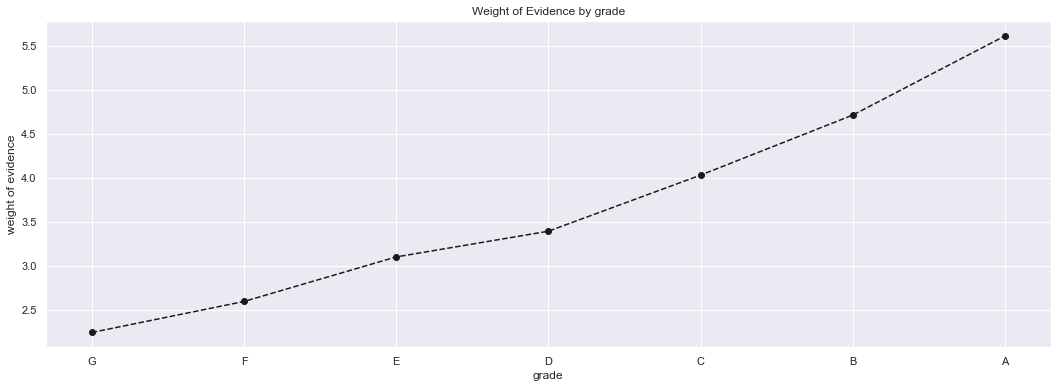

In [102]:
plot_by_woe(df_temp)

Preprocessing Discrete Variables:Creating Dummy Variable,part1

In [103]:
df_temp=woe_discrete(df_inputs_prepr,'home_ownership',df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,RENT,167644,0.976933,0.398115,163777.0,3867.0,0.396321,0.009358,3.746027,NaN,NaN,0.925109
1,OWN,45766,0.980750,0.108684,44885.0,881.0,0.108616,0.002132,3.930801,0.003817,0.184775,0.925109
2,MORTGAGE,207682,0.985059,0.493196,204579.0,3103.0,0.495057,0.007509,4.188585,0.004309,0.257784,0.925109
3,ANY,2,1.000000,0.000005,2.0,0.0,0.000005,0.000000,inf,0.014941,inf,0.925109


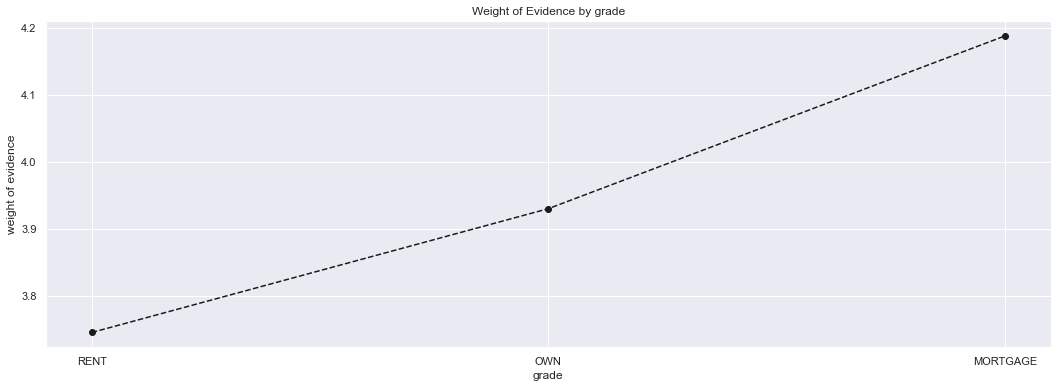

In [104]:
plot_by_woe(df_temp)

In [105]:
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'],
                                                           df_inputs_prepr['home_ownership:ANY']])

In [106]:
Load_DS['home_ownership'].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY'], dtype=object)

PREPROCESSING DISCRETE VARRIABLES:DUMMMY VARRIABLES

In [107]:
df_inputs_prepr['addr_state'].unique()

array(['DC', 'IN', 'KS', 'IL', 'OR', 'VA', 'PA', 'GA', 'TN', 'OH', 'NY',
       'FL', 'NJ', 'RI', 'NC', 'AL', 'TX', 'SC', 'MD', 'WA', 'MO', 'MN',
       'NH', 'VT', 'AZ', 'MI', 'MA', 'CA', 'LA', 'DE', 'NM', 'CO', 'WI',
       'SD', 'CT', 'NE', 'HI', 'AR', 'MT', 'WV', 'WY', 'OK', 'NV', 'KY',
       'MS', 'ME', 'UT', 'ND', 'AK'], dtype=object)

In [108]:
df_temp=woe_discrete(df_inputs_prepr,'addr_state',df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,NV,5924,0.969953,0.014068,5746.0,178.0,0.013905,0.000431,3.474476,NaN,NaN,0.923753
1,SD,835,0.970060,0.001983,810.0,25.0,0.001960,0.000060,3.478158,0.000107,0.003683,0.923753
2,HI,2083,0.973596,0.004947,2028.0,55.0,0.004908,0.000133,3.607472,0.003536,0.129314,0.923753
3,OK,3968,0.976310,0.009423,3874.0,94.0,0.009375,0.000227,3.718748,0.002715,0.111276,0.923753
4,AK,954,0.977987,0.002266,933.0,21.0,0.002258,0.000051,3.793883,0.001677,0.075135,0.923753
5,NY,33844,0.978253,0.080372,33108.0,736.0,0.080118,0.001781,3.806300,0.000266,0.012417,0.923753
6,AL,5347,0.978306,0.012698,5231.0,116.0,0.012658,0.000281,3.808768,0.000052,0.002467,0.923753
7,UT,2836,0.978491,0.006735,2775.0,61.0,0.006715,0.000148,3.817532,0.000185,0.008765,0.923753
8,WY,900,0.978889,0.002137,881.0,19.0,0.002132,0.000046,3.836619,0.000398,0.019086,0.923753
9,FL,29298,0.979111,0.069576,28686.0,612.0,0.069417,0.001481,3.847432,0.000222,0.010814,0.923753


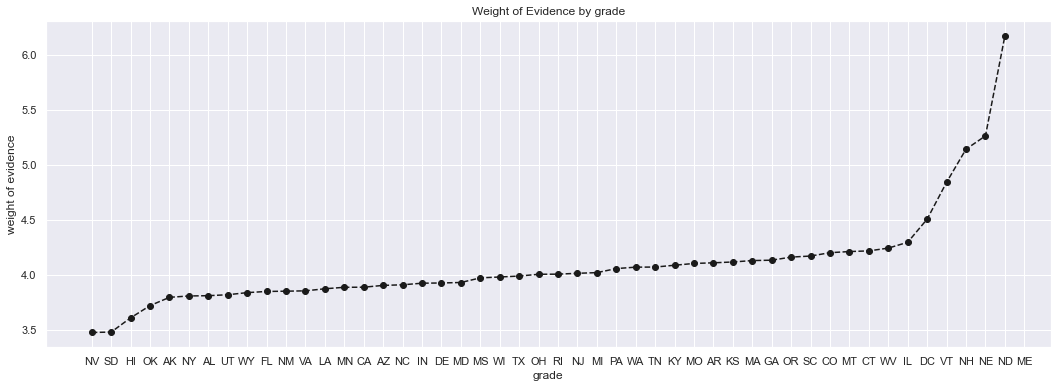

In [109]:
plot_by_woe(df_temp)

In [110]:
if['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND']=0

In [111]:
if['addr_state:ID'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ID']=0

In [112]:
if['addr_state:IA'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:IA']=0

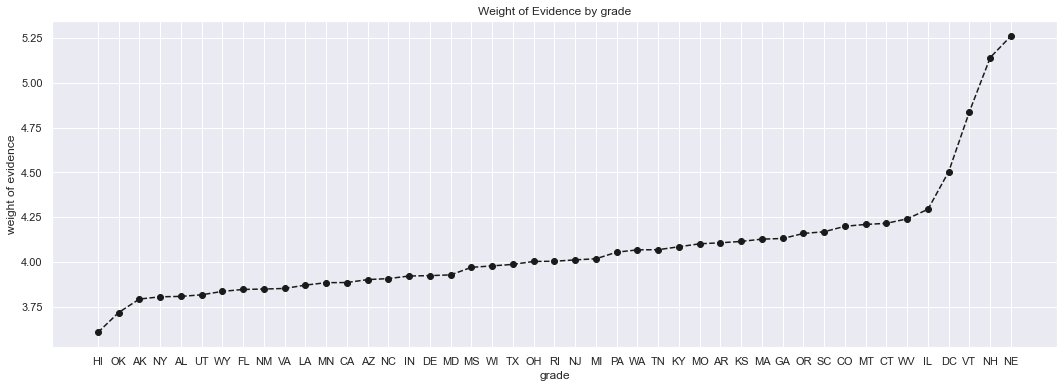

In [113]:
plot_by_woe(df_temp.iloc[2:-2,:])

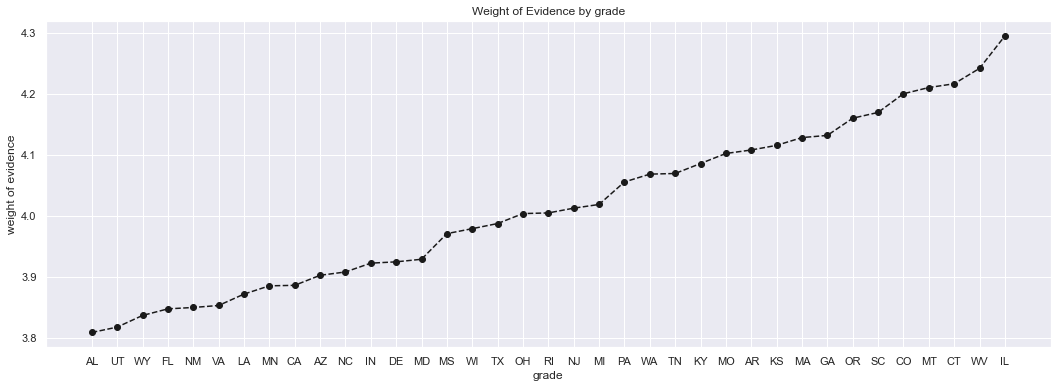

In [114]:
plot_by_woe(df_temp.iloc[6:-6,:])

In [115]:
df_inputs_prepr['addr_state:ND_NE_IA_NC_FL_HI_AL']=sum([df_inputs_prepr['addr_state:ND'],df_inputs_prepr['addr_state:IA'],
                                                       df_inputs_prepr['addr_state:NE'],df_inputs_prepr['addr_state:NC'],
                                                       df_inputs_prepr['addr_state:FL'],df_inputs_prepr['addr_state:HI'], 
                                                       df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA']=sum([df_inputs_prepr['addr_state:NM'],df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC']=sum([df_inputs_prepr['addr_state:OK'],df_inputs_prepr['addr_state:TN'],
                                                       df_inputs_prepr['addr_state:MO'],df_inputs_prepr['addr_state:LA'],
                                                       df_inputs_prepr['addr_state:MD'],df_inputs_prepr['addr_state:NC']])


df_inputs_prepr['addr_state:UT_KY_AZ_NJ']=sum([df_inputs_prepr['addr_state:UT'],df_inputs_prepr['addr_state:KY'],
                                                       df_inputs_prepr['addr_state:AZ'],df_inputs_prepr['addr_state:NJ']])


df_inputs_prepr['addr_state:AR_MI_PA_OH_MN']=sum([df_inputs_prepr['addr_state:AR'],df_inputs_prepr['addr_state:MI'],
                                                       df_inputs_prepr['addr_state:PA'],df_inputs_prepr['addr_state:OH'],
                                                       df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN']=sum([df_inputs_prepr['addr_state:RI'],df_inputs_prepr['addr_state:MA'],
                                                       df_inputs_prepr['addr_state:DE'],df_inputs_prepr['addr_state:SD'],
                                                       df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR']=sum([df_inputs_prepr['addr_state:GA'],df_inputs_prepr['addr_state:WA'],
                                                       df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT']=sum([df_inputs_prepr['addr_state:WI'],df_inputs_prepr['addr_state:MT']])


df_inputs_prepr['addr_state:IL_CT']=sum([df_inputs_prepr['addr_state:IL'],df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS']=sum([df_inputs_prepr['addr_state:KS'],df_inputs_prepr['addr_state:SC'],
                                                       df_inputs_prepr['addr_state:CO'],df_inputs_prepr['addr_state:VT'],
                                                       df_inputs_prepr['addr_state:AK'],df_inputs_prepr['addr_state:MS']])


df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID']=sum([df_inputs_prepr['addr_state:WV'],df_inputs_prepr['addr_state:NH'],
                                                       df_inputs_prepr['addr_state:WY'],df_inputs_prepr['addr_state:DC'],
                                                       df_inputs_prepr['addr_state:ME'],df_inputs_prepr['addr_state:ID']])

In [116]:
df_inputs_prepr['verification_status'].unique()

array(['Source Verified', 'Not Verified', 'Verified'], dtype=object)

In [117]:
df_temp=woe_discrete(df_inputs_prepr,'verification_status',df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,123016,0.976532,0.292134,120129.0,2887.0,0.290698,0.006986,3.728348,NaN,NaN,0.925137
1,Source Verified,179565,0.981110,0.426425,176173.0,3392.0,0.426318,0.008208,3.950047,0.004578,0.221698,0.925137
2,Not Verified,118513,0.986736,0.281441,116941.0,1572.0,0.282984,0.003804,4.309321,0.005626,0.359274,0.925137


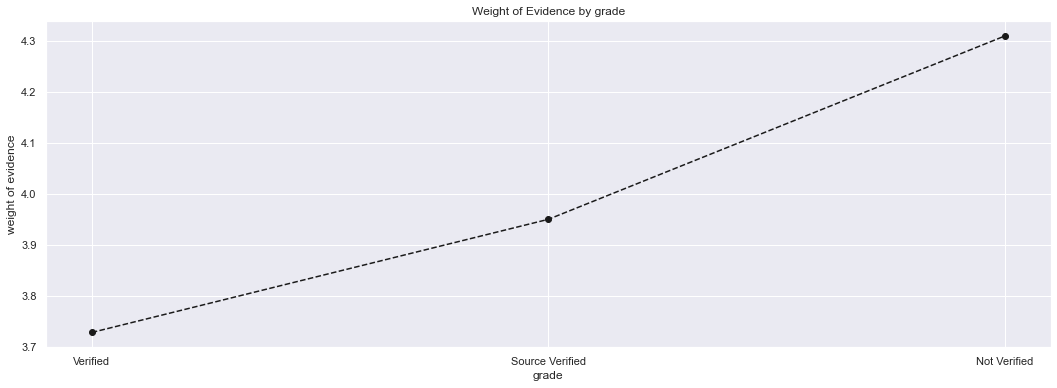

In [118]:
plot_by_woe(df_temp)

In [119]:
df_inputs_prepr['purpose'].unique()

array(['home_improvement', 'credit_card', 'debt_consolidation',
       'major_purchase', 'other', 'medical', 'small_business', 'house',
       'car', 'vacation', 'moving', 'renewable_energy', 'wedding',
       'educational'], dtype=object)

In [120]:
df_temp=woe_discrete(df_inputs_prepr,'purpose',df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,wedding,4,0.750000,0.000009,3.0,1.0,0.000007,0.000002,1.098612,NaN,NaN,0.925279
1,renewable_energy,224,0.955357,0.000532,214.0,10.0,0.000518,0.000024,3.063391,0.205357,1.964779,0.925279
2,small_business,3364,0.958680,0.007989,3225.0,139.0,0.007804,0.000336,3.144214,0.003323,0.080823,0.925279
3,moving,2420,0.965289,0.005747,2336.0,84.0,0.005653,0.000203,3.325379,0.006609,0.181164,0.925279
4,house,1438,0.967316,0.003415,1391.0,47.0,0.003366,0.000114,3.387631,0.002026,0.062252,0.925279
5,medical,3938,0.970797,0.009352,3823.0,115.0,0.009251,0.000278,3.503859,0.003482,0.116228,0.925279
6,major_purchase,7449,0.975970,0.017690,7270.0,179.0,0.017593,0.000433,3.704126,0.005173,0.200267,0.925279
7,other,19204,0.976672,0.045605,18756.0,448.0,0.045387,0.001084,3.734476,0.000702,0.030350,0.925279
8,vacation,2249,0.977768,0.005341,2199.0,50.0,0.005321,0.000121,3.783735,0.001096,0.049259,0.925279
9,debt_consolidation,250020,0.979878,0.593739,244989.0,5031.0,0.592845,0.012174,3.885595,0.002110,0.101860,0.925279


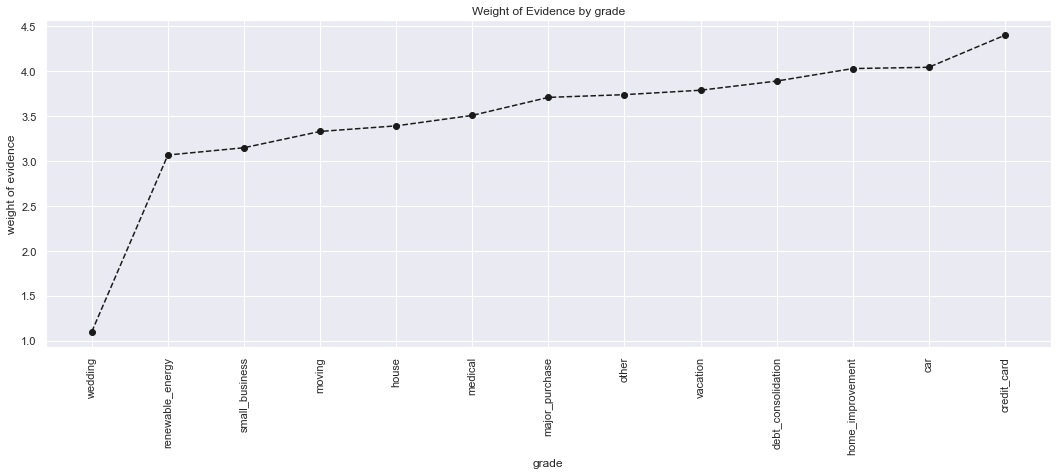

In [121]:
plot_by_woe(df_temp,90)

In [122]:
df_inputs_prepr['purpose:educ_sm_b_wedd_ren_en_mov_house']=sum([df_inputs_prepr['purpose:small_business'],df_inputs_prepr['purpose:educational'],
                                                               df_inputs_prepr['purpose:renewable_energy'],df_inputs_prepr['purpose:moving'],
                                  -                              df_inputs_prepr['purpose:house'],df_inputs_prepr['purpose:other'],
                                                               df_inputs_prepr['purpose:medical'],df_inputs_prepr['purpose:wedding'],
                                                               df_inputs_prepr['purpose:vacation'],df_inputs_prepr['purpose:debt_consolidation'],
                                                               df_inputs_prepr['purpose:home_improvement'],df_inputs_prepr['purpose:major_purchase'],
                                                               df_inputs_prepr['purpose:car'],df_inputs_prepr['purpose:credit_card']])

In [123]:
df_inputs_prepr['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

In [124]:
df_temp=woe_discrete(df_inputs_prepr,'initial_list_status',df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,f,153843,0.972550,0.365341,149620.0,4223.0,0.362063,0.010219,3.567553,NaN,NaN,0.925916
1,w,267251,0.986425,0.634659,263623.0,3628.0,0.637937,0.008779,4.285839,0.013875,0.718286,0.925916


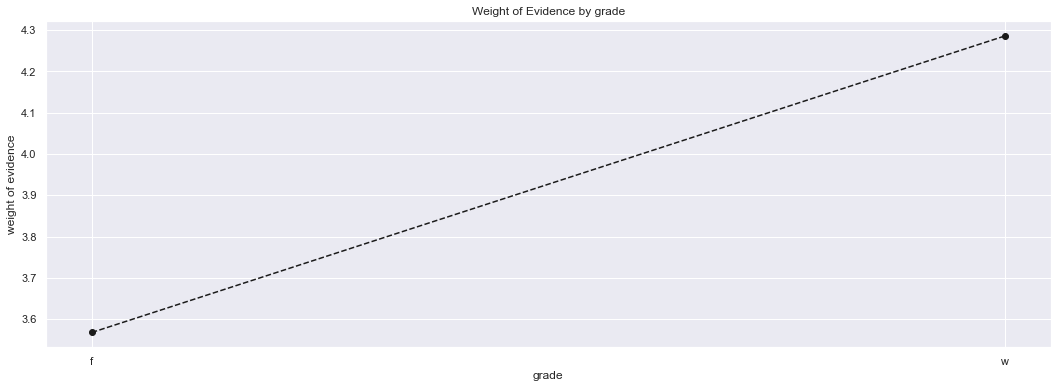

In [125]:
plot_by_woe(df_temp)

PREPROCESSING CONTINUOUS VARIABLES:AUTOMATING CALCULATIONS AND VISUALIZING RESULTS

In [126]:
def woe_continuous(df,discrete_variable_name,good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name],good_bad_variable_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].count(),
                   df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].mean()],axis=1)
    df= df.iloc[:,[0,1,3]]
    df.columns=[df1.columns.values[0],'n_obs','prop_good']
    df['prop_n_obs']=df['n_obs']/df['n_obs'].sum()
    df['n_good']=df['prop_good']*df['n_obs']
    df['n_bad']=(1-df['prop_good'])*df['n_obs']
    df['prop_n_good']=df['n_good']/df['n_good'].sum()
    df['prop_n_bad']=df['n_bad']/df['n_good'].sum()
    df['WoE']=np.log(df['prop_n_good']/df['prop_n_bad'])
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE']=df['WoE'].diff().abs()
    df['IV'] = df['prop_n_good'] - df['prop_n_bad']*df['WoE']
    df['IV']=df['IV'].sum()
    return df

PREPROCESSING CONTNUOUS VARIABLES:CREATING DUMMY VARIABLES

In [127]:
df_inputs_prepr['term_int'].unique()

array([60, 36])

In [128]:
df_temp=woe_continuous(df_inputs_prepr, 'term_int',df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,36,283172,0.983533,0.672467,278509.0,4663.0,0.673959,0.011284,4.089791,NaN,NaN,0.924968
1,60,137922,0.976885,0.327533,134734.0,3188.0,0.326041,0.007715,3.743909,0.006647,0.345883,0.924968


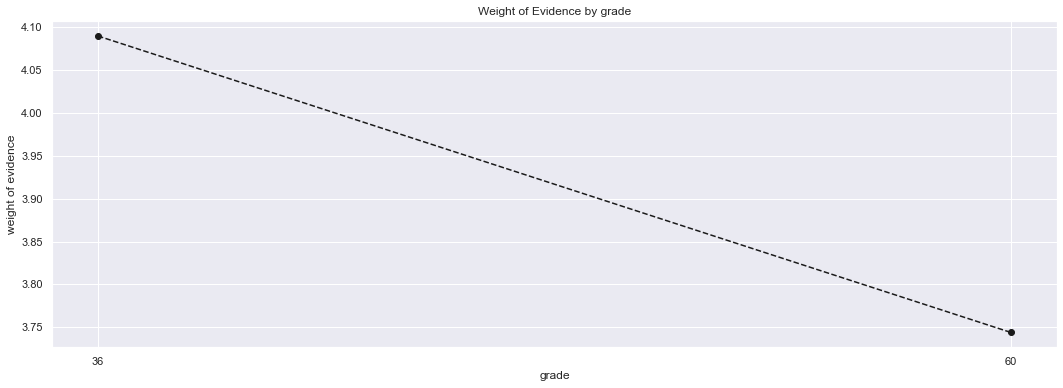

In [129]:
plot_by_woe(df_temp)

In [130]:
df_inputs_prepr['term:36']=np.where((df_inputs_prepr['term_int'] ==36),1,0)
df_inputs_prepr['term:60']=np.where((df_inputs_prepr['term_int']==60),1,0)

In [131]:
df_inputs_prepr['emp_length_int'].unique()

array([10.0, 0.0, 5.0, 3.0, 4.0, '0', 2.0, 8.0, 9.0, 1.0, 6.0, 7.0],
      dtype=object)

In [132]:
df_temp=woe_continuous(df_inputs_prepr,'emp_length_int',df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0,34340,0.978130,0.081549,33589.0,751.0,0.081281,0.001817,3.800548,NaN,NaN,0.924884
1,1,27473,0.977687,0.065242,26860.0,613.0,0.064998,0.001483,3.780029,0.000443,0.020520,0.924884
2,2,37497,0.980932,0.089047,36782.0,715.0,0.089008,0.001730,3.940481,0.003245,0.160453,0.924884
3,3,33430,0.980975,0.079388,32794.0,636.0,0.079358,0.001539,3.942802,0.000043,0.002321,0.924884
4,4,24506,0.979678,0.058196,24008.0,498.0,0.058097,0.001205,3.875542,0.001297,0.067260,0.924884
5,5,24930,0.980866,0.059203,24453.0,477.0,0.059173,0.001154,3.936992,0.001188,0.061449,0.924884
6,6,16838,0.978976,0.039986,16484.0,354.0,0.039889,0.000857,3.840849,0.001890,0.096143,0.924884
7,7,18414,0.979201,0.043729,18031.0,383.0,0.043633,0.000927,3.851813,0.000224,0.010964,0.924884
8,8,21560,0.983905,0.051200,21213.0,347.0,0.051333,0.000840,4.113045,0.004705,0.261232,0.924884
9,9,16769,0.982289,0.039822,16472.0,297.0,0.039860,0.000719,4.015685,0.001617,0.097360,0.924884


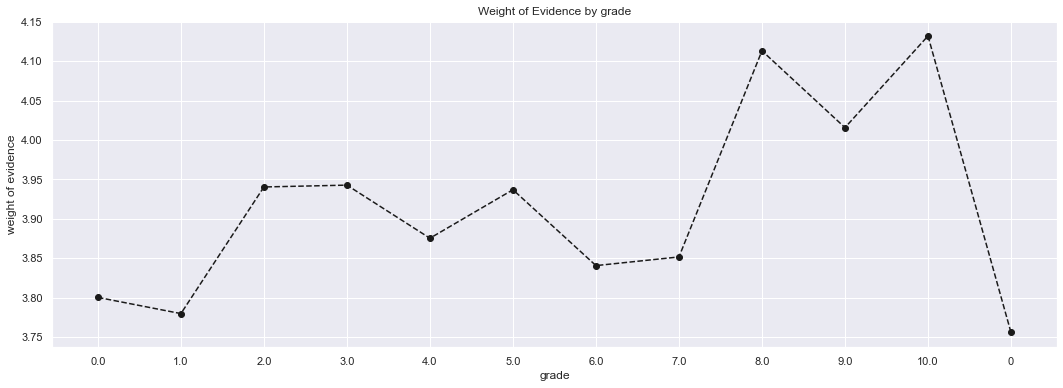

In [133]:
plot_by_woe(df_temp)

In [134]:
df_inputs_prepr['emp_length:0']=np.where(df_inputs_prepr['emp_length_int'].isin([0]),1,0)
df_inputs_prepr['emp_length:1']=np.where(df_inputs_prepr['emp_length_int'].isin([1]),1,0)
df_inputs_prepr['emp_length:2-4']=np.where(df_inputs_prepr['emp_length_int'].isin(range(2,5)),1,0)
df_inputs_prepr['emp_length:5-6']=np.where(df_inputs_prepr['emp_length_int'].isin(range(5,7)),1,0)
df_inputs_prepr['emp_length:7-9']=np.where(df_inputs_prepr['emp_length_int'].isin(range(7,10)),1,0)
df_inputs_prepr['emp_length:10']=np.where(df_inputs_prepr['emp_length_int'].isin([10]),1,0)

In [135]:
df_inputs_prepr['mths_since_issued_date'].unique()

array([48., 49., 50., 51., 52., 53., 54., 55., 56., 57., 58., 59.])

In [136]:
df_inputs_prepr['mths_since_issued_date_factor']=pd.cut(df_inputs_prepr['mths_since_issued_date'],50)

In [137]:
df_inputs_prepr['mths_since_issued_date_factor']

0         (47.989, 48.22]
1         (47.989, 48.22]
2         (47.989, 48.22]
3         (47.989, 48.22]
4         (47.989, 48.22]
               ...       
421089      (58.78, 59.0]
421090      (58.78, 59.0]
421091      (58.78, 59.0]
421092      (58.78, 59.0]
421093      (58.78, 59.0]
Name: mths_since_issued_date_factor, Length: 421094, dtype: category
Categories (50, interval[float64]): [(47.989, 48.22] < (48.22, 48.44] < (48.44, 48.66] < (48.66, 48.88] ... (58.12, 58.34] < (58.34, 58.56] < (58.56, 58.78] < (58.78, 59.0]]

In [138]:
df_temp=woe_continuous(df_inputs_prepr,'mths_since_issued_date_factor',df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(47.989, 48.22]",44342,1.000000,0.105302,44342.0,0.0,0.107302,0.000000,inf,NaN,NaN,0.825993
1,"(48.22, 48.44]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.825993
2,"(48.44, 48.66]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.825993
3,"(48.66, 48.88]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.825993
4,"(48.88, 49.1]",37530,0.998082,0.089125,37458.0,72.0,0.090644,0.000174,6.254309,NaN,NaN,0.825993
5,"(49.1, 49.32]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.825993
6,"(49.32, 49.54]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.825993
7,"(49.54, 49.76]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.825993
8,"(49.76, 49.98]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.825993
9,"(49.98, 50.2]",48631,0.997327,0.115487,48501.0,130.0,0.117367,0.000315,5.921805,NaN,NaN,0.825993


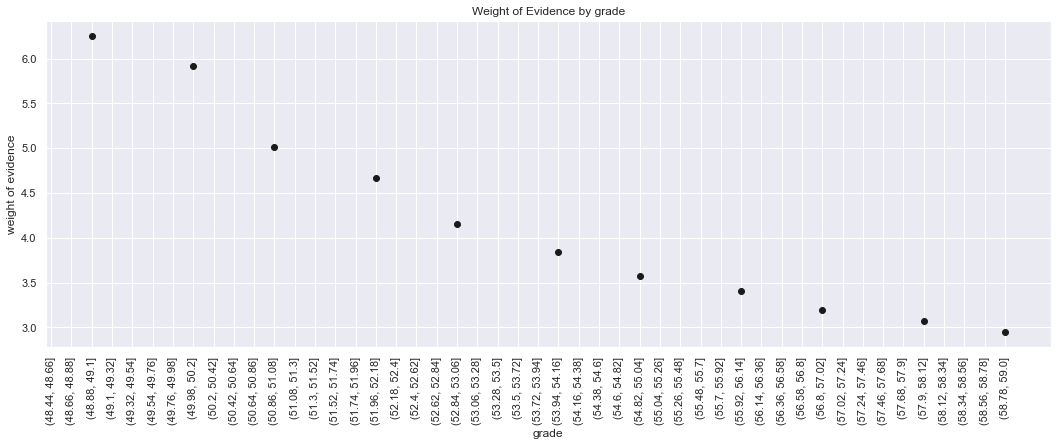

In [139]:
plot_by_woe(df_temp,90)

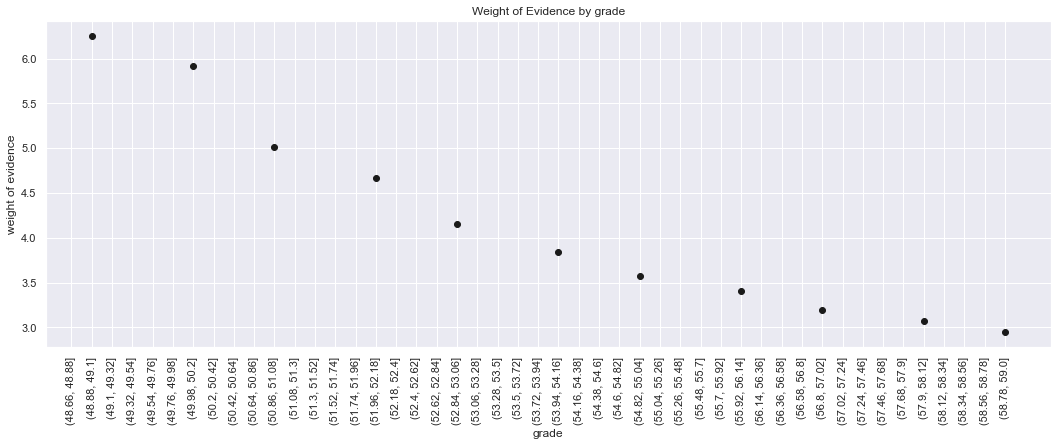

In [140]:
plot_by_woe(df_temp.iloc[3:,:],90)

In [141]:
df_inputs_prepr['mths_since_issued_date:<38']=np.where(df_inputs_prepr['mths_since_issued_date'].isin(range(38)),1,0)
df_inputs_prepr['mths_since_issued_date:38-39']=np.where(df_inputs_prepr['mths_since_issued_date'].isin(range(38,40)),1,0)
df_inputs_prepr['mths_since_issued_date:40-41']=np.where(df_inputs_prepr['mths_since_issued_date'].isin(range(40,42)),1,0)
df_inputs_prepr['mths_since_issued_date:42-48']=np.where(df_inputs_prepr['mths_since_issued_date'].isin(range(42,49)),1,0)
df_inputs_prepr['mths_since_issued_date:49-52']=np.where(df_inputs_prepr['mths_since_issued_date'].isin(range(49,53)),1,0)
df_inputs_prepr['mths_since_issued_date:53-64']=np.where(df_inputs_prepr['mths_since_issued_date'].isin(range(53,65)),1,0)
df_inputs_prepr['mths_since_issued_date:65-84']=np.where(df_inputs_prepr['mths_since_issued_date'].isin(range(65,85)),1,0)
df_inputs_prepr['mths_since_issued_date:>84']=np.where(df_inputs_prepr['mths_since_issued_date'].isin(range(85,int(df_inputs_prepr['mths_since_issued_date'].max()))),1,0)

In [142]:
df_inputs_prepr['int_rate_factor']=pd.cut(df_inputs_prepr['int_rate'],50)

In [143]:
df_temp=woe_continuous(df_inputs_prepr,'int_rate_factor',df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.296, 5.793]",9651,0.999689,0.022919,9648.0,3.0,0.023347,0.000007,8.075894,NaN,NaN,0.931449
1,"(5.793, 6.267]",10214,0.997259,0.024256,10186.0,28.0,0.024649,0.000068,5.896565,0.002430,2.179329,0.931449
2,"(6.267, 6.74]",6530,0.994793,0.015507,6496.0,34.0,0.015720,0.000082,5.252581,0.002465,0.643984,0.931449
3,"(6.74, 7.214]",12488,0.995275,0.029656,12429.0,59.0,0.030077,0.000143,5.350250,0.000482,0.097669,0.931449
4,"(7.214, 7.687]",11416,0.997985,0.027110,11393.0,23.0,0.027570,0.000056,6.205260,0.002710,0.855010,0.931449
5,"(7.687, 8.16]",20636,0.995687,0.049006,20547.0,89.0,0.049721,0.000215,5.441834,0.002298,0.763426,0.931449
6,"(8.16, 8.634]",22498,0.994133,0.053428,22366.0,132.0,0.054123,0.000319,5.132495,0.001554,0.309339,0.931449
7,"(8.634, 9.107]",2020,0.979703,0.004797,1979.0,41.0,0.004789,0.000099,3.876775,0.014430,1.255720,0.931449
8,"(9.107, 9.581]",22171,0.992783,0.052651,22011.0,160.0,0.053264,0.000387,4.924124,0.013080,1.047349,0.931449
9,"(9.581, 10.054]",22364,0.993829,0.053109,22226.0,138.0,0.053784,0.000334,5.081764,0.001046,0.157641,0.931449


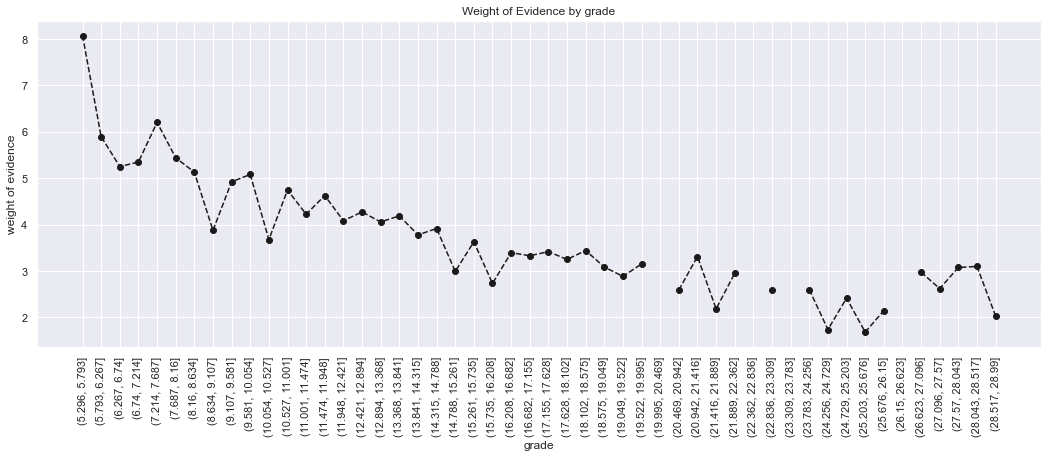

In [144]:
plot_by_woe(df_temp,90)

In [145]:
df_inputs_prepr['int_rate:<9.548']=np.where((df_inputs_prepr['int_rate']<= 0.548),1,0)
df_inputs_prepr['int_rate:9.548-12.025']=np.where((df_inputs_prepr['int_rate']>9.548)&(df_inputs_prepr['int_rate']<=12.025),1,0)
df_inputs_prepr['int_rate:12.025-15.74']=np.where((df_inputs_prepr['int_rate']>12.025)&(df_inputs_prepr['int_rate']<=15.74),1,0)
df_inputs_prepr['int_rate:15.74-20.281']=np.where((df_inputs_prepr['int_rate']>15.74)&(df_inputs_prepr['int_rate']<=20.281),1,0)
df_inputs_prepr['int_rate:20.281']=np.where((df_inputs_prepr['int_rate']>20.281),1,0)



In [146]:
df_inputs_prepr['funded_amnt_factor']=pd.cut(df_inputs_prepr['funded_amnt'],50)
df_temp=woe_continuous(df_inputs_prepr,'funded_amnt_factor',df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(966.0, 1680.0]",3391,0.982306,0.008053,3331.0,60.0,0.008061,0.000145,4.016683,NaN,NaN,0.924965
1,"(1680.0, 2360.0]",3751,0.981338,0.008908,3681.0,70.0,0.008908,0.000169,3.962444,0.000968,0.054239,0.924965
2,"(2360.0, 3040.0]",8134,0.981190,0.019316,7981.0,153.0,0.019313,0.000370,3.954381,0.000148,0.008063,0.924965
3,"(3040.0, 3720.0]",5133,0.983246,0.012190,5047.0,86.0,0.012213,0.000208,4.072202,0.002056,0.117821,0.924965
4,"(3720.0, 4400.0]",7315,0.980041,0.017371,7169.0,146.0,0.017348,0.000353,3.893915,0.003205,0.178287,0.924965
5,"(4400.0, 5080.0]",18150,0.982479,0.043102,17832.0,318.0,0.043151,0.000770,4.026698,0.002438,0.132784,0.924965
6,"(5080.0, 5760.0]",5617,0.984867,0.013339,5532.0,85.0,0.013387,0.000206,4.175653,0.002388,0.148955,0.924965
7,"(5760.0, 6440.0]",16224,0.982618,0.038528,15942.0,282.0,0.038578,0.000682,4.034805,0.002249,0.140848,0.924965
8,"(6440.0, 7120.0]",10565,0.982489,0.025089,10380.0,185.0,0.025118,0.000448,4.027280,0.000129,0.007525,0.924965
9,"(7120.0, 7800.0]",8423,0.980173,0.020003,8256.0,167.0,0.019979,0.000404,3.900702,0.002316,0.126579,0.924965


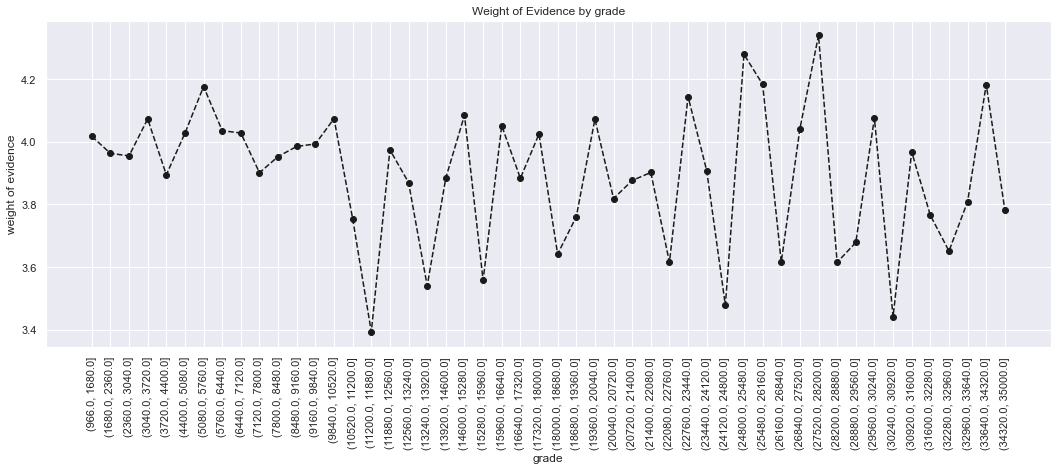

In [147]:
plot_by_woe(df_temp,90)

In [148]:
df_inputs_prepr['mths_since_earliest_cr_line']=df_inputs_prepr['mths_since_earliest_cr_line'].astype(float)

In [149]:
df_inputs_prepr['mths_since_earliest_cr_line_factor']=pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'],50)

In [150]:
df_inputs_prepr['mths_since_earliest_cr_line_factor']

0          (324.0, 334.52]
1         (187.24, 197.76]
2           (71.52, 82.04]
3          (218.8, 229.32]
4         (197.76, 208.28]
                ...       
421089     (155.68, 166.2]
421090     (523.88, 534.4]
421091     (166.2, 176.72]
421092     (166.2, 176.72]
421093    (187.24, 197.76]
Name: mths_since_earliest_cr_line_factor, Length: 421094, dtype: category
Categories (50, interval[float64]): [(60.474, 71.52] < (71.52, 82.04] < (82.04, 92.56] < (92.56, 103.08] ... (544.92, 555.44] < (555.44, 565.96] < (565.96, 576.48] < (576.48, 587.0]]

In [151]:
df_temp=woe_continuous(df_inputs_prepr,'mths_since_earliest_cr_line_factor',df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(60.474, 71.52]",2001,0.984508,0.004752,1970.0,31.0,0.004767,0.000075,4.151802,NaN,NaN,0.925083
1,"(71.52, 82.04]",4886,0.974417,0.011603,4761.0,125.0,0.011521,0.000302,3.639899,0.010091,0.511902,0.925083
2,"(82.04, 92.56]",4610,0.972017,0.010948,4481.0,129.0,0.010843,0.000312,3.547789,0.002399,0.092110,0.925083
3,"(92.56, 103.08]",5446,0.975762,0.012933,5314.0,132.0,0.012859,0.000319,3.695298,0.003745,0.147509,0.925083
4,"(103.08, 113.6]",6146,0.968272,0.014595,5951.0,195.0,0.014401,0.000472,3.418315,0.007490,0.276983,0.925083
5,"(113.6, 124.12]",10200,0.978137,0.024223,9977.0,223.0,0.024143,0.000540,3.800866,0.009865,0.382551,0.925083
6,"(124.12, 134.64]",11155,0.974361,0.026491,10869.0,286.0,0.026302,0.000692,3.637678,0.003776,0.163188,0.925083
7,"(134.64, 145.16]",15641,0.977111,0.037144,15283.0,358.0,0.036983,0.000866,3.753963,0.002750,0.116285,0.925083
8,"(145.16, 155.68]",18480,0.979275,0.043886,18097.0,383.0,0.043793,0.000927,3.855466,0.002163,0.101503,0.925083
9,"(155.68, 166.2]",24374,0.977066,0.057883,23815.0,559.0,0.057630,0.001353,3.751921,0.002209,0.103545,0.925083


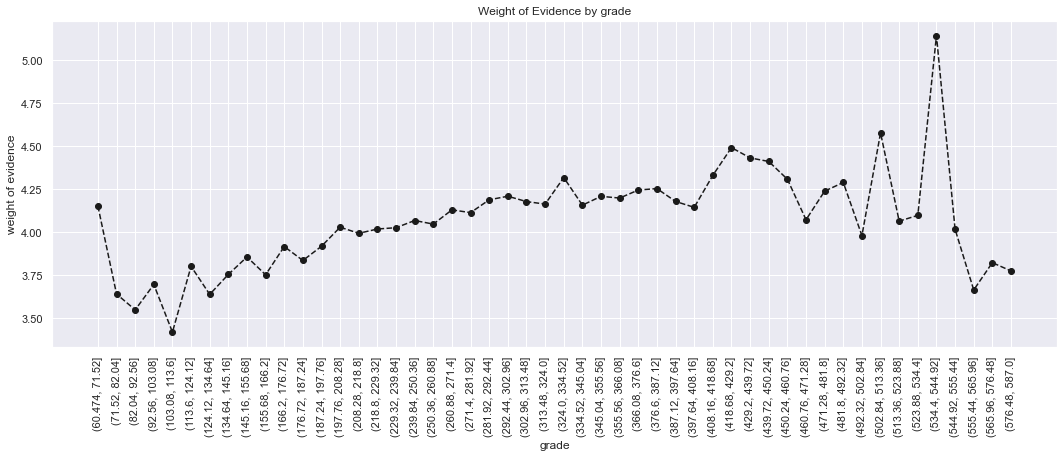

In [152]:
plot_by_woe(df_temp,90)

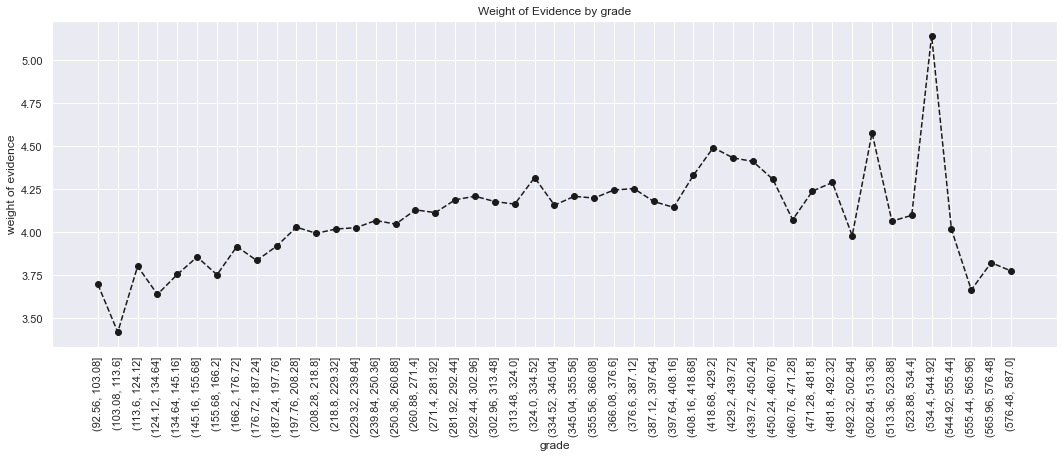

In [153]:
plot_by_woe(df_temp.iloc[3:,:],90)

In [154]:
df_inputs_prepr['mths_since_earliest_cr_line:<140']=np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140)),1,0)
df_inputs_prepr['mths_since_earliest_cr_line:140-239']=np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140,240)),1,0)
df_inputs_prepr['mths_since_earliest_cr_line:240-339']=np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(240,340)),1,0)
df_inputs_prepr['mths_since_earliest_cr_line:340-439']=np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(340,440)),1,0)
df_inputs_prepr['mths_since_earliest_cr_line:440-539']=np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(440,540)),1,0)
df_inputs_prepr['mths_since_earliest_cr_line:540-600']=np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(540,600)),1,0)
df_inputs_prepr['mths_since_earliest_cr_line:>600']=np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(600,int(df_inputs_prepr['mths_since_issued_date'].max()))),1,0)

In [155]:
df_inputs_prepr['installment'].unique()

array([778.38, 260.5 , 146.16, ..., 459.22, 237.86, 220.37])

In [156]:
df_inputs_prepr['installment_factor']=pd.cut(df_inputs_prepr['installment'],50)
df_temp=woe_continuous(df_inputs_prepr,'installment_factor',df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(28.705, 58.427]",3506,0.982886,0.008326,3446.0,60.0,0.008339,0.000145,4.050625,NaN,NaN,0.925112
1,"(58.427, 86.734]",5832,0.981310,0.013850,5723.0,109.0,0.013849,0.000264,3.960901,0.001576,0.089724,0.925112
2,"(86.734, 115.04]",8123,0.983134,0.019290,7986.0,137.0,0.019325,0.000332,4.065464,0.001824,0.104564,0.925112
3,"(115.04, 143.347]",9139,0.982383,0.021703,8978.0,161.0,0.021726,0.000390,4.021128,0.000751,0.044336,0.925112
4,"(143.347, 171.654]",17953,0.984459,0.042634,17674.0,279.0,0.042769,0.000675,4.148638,0.002076,0.127510,0.925112
5,"(171.654, 199.961]",15515,0.985691,0.036845,15293.0,222.0,0.037007,0.000537,4.232473,0.001232,0.083835,0.925112
6,"(199.961, 228.268]",16515,0.982864,0.039219,16232.0,283.0,0.039280,0.000685,4.049293,0.002827,0.183180,0.925112
7,"(228.268, 256.574]",22043,0.983033,0.052347,21669.0,374.0,0.052436,0.000905,4.059382,0.000169,0.010089,0.925112
8,"(256.574, 284.881]",25323,0.980966,0.060136,24841.0,482.0,0.060112,0.001166,3.942307,0.002067,0.117075,0.925112
9,"(284.881, 313.188]",24135,0.980443,0.057315,23663.0,472.0,0.057262,0.001142,3.914689,0.000523,0.027618,0.925112


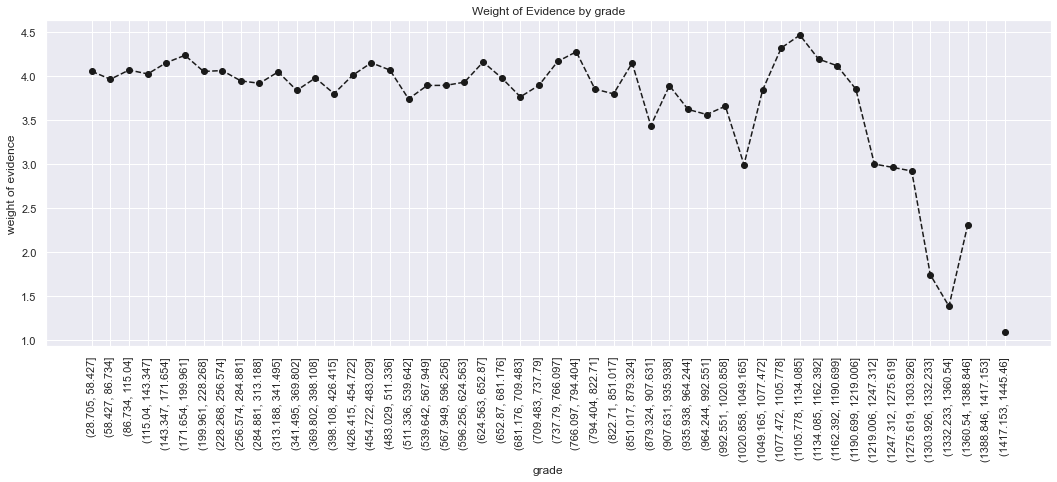

In [157]:
plot_by_woe(df_temp,90)

In [158]:
df_inputs_prepr['delinq_2yrs']=df_inputs_prepr['delinq_2yrs'].astype(float)

In [159]:
df_inputs_prepr['delinq_2yrs_factors']=pd.cut(df_inputs_prepr['delinq_2yrs'],50)

In [160]:
df_temp=woe_continuous(df_inputs_prepr,'delinq_2yrs',df_targets_prepr)
df_temp

/Users/sushmita/opt/anaconda3/lib/python3.8/site-packages/pandas/core/algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,334007,0.981812,0.793189,327932.0,6075.0,0.793557,0.014701,3.988624,NaN,NaN,0.924428
1,1.0,57000,0.980246,0.135362,55874.0,1126.0,0.135209,0.002725,3.904428,0.001566,0.084197,0.924428
2,2.0,17241,0.979120,0.040943,16881.0,360.0,0.040850,0.000871,3.847840,0.001126,0.056588,0.924428
3,3.0,6293,0.976800,0.014944,6147.0,146.0,0.014875,0.000353,3.740113,0.002320,0.107727,0.924428
4,4.0,2949,0.976263,0.007003,2879.0,70.0,0.006967,0.000169,3.716703,0.000536,0.023410,0.924428
5,5.0,1475,0.978305,0.003503,1443.0,32.0,0.003492,0.000077,3.808744,0.002042,0.092041,0.924428
6,6.0,842,0.980998,0.002000,826.0,16.0,0.001999,0.000039,3.944006,0.002693,0.135262,0.924428
7,7.0,438,0.984018,0.001040,431.0,7.0,0.001043,0.000017,4.120198,0.003021,0.176192,0.924428
8,8.0,284,0.982394,0.000674,279.0,5.0,0.000675,0.000012,4.021774,0.001624,0.098424,0.924428
9,9.0,173,0.976879,0.000411,169.0,4.0,0.000409,0.000010,3.743604,0.005516,0.278170,0.924428


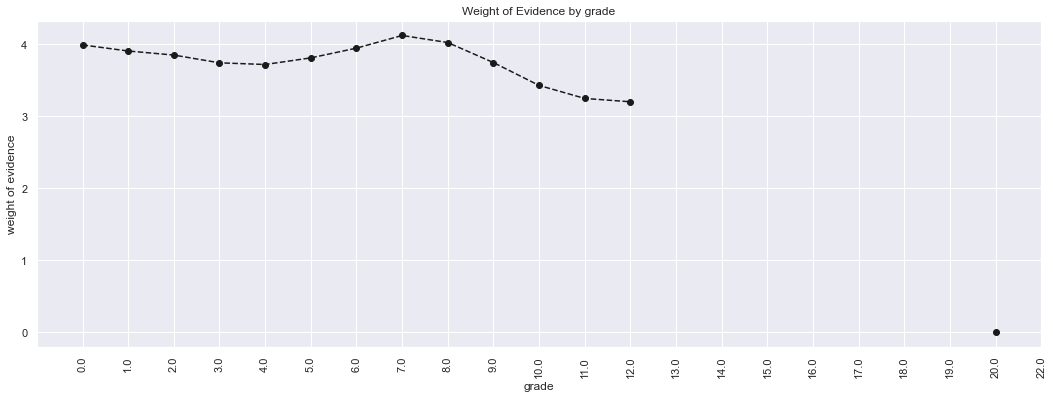

In [161]:
plot_by_woe(df_temp,90)

In [162]:
df_inputs_prepr['delinq_2yrs:0']=np.where((df_inputs_prepr['delinq_2yrs']>= 0.0),1,0)
df_inputs_prepr['delinq_2yrs:0-3']=np.where((df_inputs_prepr['delinq_2yrs']>0.0)&(df_inputs_prepr['delinq_2yrs']<=3),1,0)
df_inputs_prepr['delinq_2yrs:3-7']=np.where((df_inputs_prepr['delinq_2yrs']>3)&(df_inputs_prepr['delinq_2yrs']<=7),1,0)
df_inputs_prepr['delinq_2yrs:7-9']=np.where((df_inputs_prepr['delinq_2yrs']>7)&(df_inputs_prepr['delinq_2yrs']<=9),1,0)
df_inputs_prepr['delinq_2yrs:9-11']=np.where((df_inputs_prepr['delinq_2yrs']>9)&(df_inputs_prepr['delinq_2yrs']<=11),1,0)
df_inputs_prepr['delinq_2yrs:11-12']=np.where((df_inputs_prepr['delinq_2yrs']>11)&(df_inputs_prepr['delinq_2yrs']<=12),1,0)
df_inputs_prepr['delinq_2yrs:12-18']=np.where((df_inputs_prepr['delinq_2yrs']>12)&(df_inputs_prepr['delinq_2yrs']<=18),1,0)
df_inputs_prepr['delinq_2yrs:>18']=np.where((df_inputs_prepr['delinq_2yrs']>18),0,1)

In [163]:
df_inputs_prepr['inq_last_6mths']=df_inputs_prepr['inq_last_6mths'].astype(float)

In [164]:
df_temp=woe_continuous(df_inputs_prepr,'inq_last_6mths',df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,256407,0.984813,0.608907,252513.0,3894.0,0.611052,0.009423,4.172026,NaN,NaN,0.925379
1,1.0,111346,0.978571,0.264421,108960.0,2386.0,0.263671,0.005774,3.821363,0.006242,0.350663,0.925379
2,2.0,36292,0.973438,0.086185,35328.0,964.0,0.085490,0.002333,3.601340,0.005134,0.220023,0.925379
3,3.0,12272,0.964635,0.029143,11838.0,434.0,0.028647,0.001050,3.306025,0.008803,0.295314,0.925379
4,4.0,3517,0.966164,0.008352,3398.0,119.0,0.008223,0.000288,3.351819,0.001529,0.045793,0.925379
5,5.0,1217,0.957272,0.002890,1165.0,52.0,0.002819,0.000126,3.109233,0.008892,0.242586,0.925379
6,6.0,43,0.953488,0.000102,41.0,2.0,0.000099,0.000005,3.020425,0.003784,0.088808,0.925379


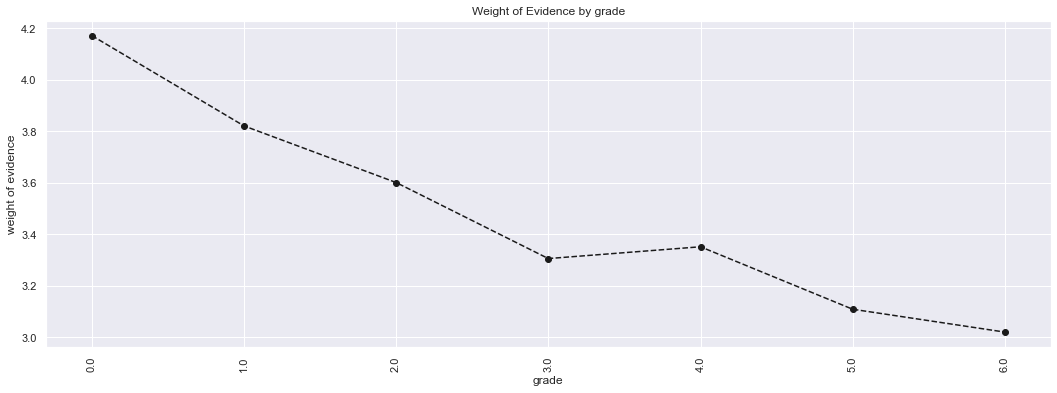

In [165]:
plot_by_woe(df_temp,90)

In [166]:
df_inputs_prepr['inq_last_6mths:0']=np.where((df_inputs_prepr['inq_last_6mths']>= 0.0),1,0)
df_inputs_prepr['inq_last_6mths:0-3']=np.where((df_inputs_prepr['inq_last_6mths']>0.0)&(df_inputs_prepr['inq_last_6mths']<=3),1,0)
df_inputs_prepr['inq_last_6mths:3-7']=np.where((df_inputs_prepr['inq_last_6mths']>3)&(df_inputs_prepr['inq_last_6mths']<=7),1,0)
df_inputs_prepr['inq_last_6mths:7-9']=np.where((df_inputs_prepr['inq_last_6mths']>7)&(df_inputs_prepr['inq_last_6mths']<=9),1,0)
df_inputs_prepr['inq_last_6mths:9-11']=np.where((df_inputs_prepr['inq_last_6mths']>9)&(df_inputs_prepr['inq_last_6mths']<=11),1,0)
df_inputs_prepr['inq_last_6mths:11-12']=np.where((df_inputs_prepr['inq_last_6mths']>11)&(df_inputs_prepr['inq_last_6mths']<=12),1,0)
df_inputs_prepr['inq_last_6mths:12-18']=np.where((df_inputs_prepr['inq_last_6mths']>12)&(df_inputs_prepr['inq_last_6mths']<=18),1,0)
df_inputs_prepr['inq_last_6mths:18']=np.where((df_inputs_prepr['inq_last_6mths']>18),0,1)

In [167]:
df_inputs_prepr['open_acc']=df_inputs_prepr['open_acc'].astype(float)
df_temp=woe_continuous(df_inputs_prepr,'open_acc',df_targets_prepr)
df_temp

/Users/sushmita/opt/anaconda3/lib/python3.8/site-packages/pandas/core/algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,1.0,90,0.988889,0.000214,89.0,1.0,0.000215,0.000002,4.488636,NaN,NaN,0.924363
1,2.0,986,0.972617,0.002342,959.0,27.0,0.002321,0.000065,3.570054,0.016272,0.918582,0.924363
2,3.0,4119,0.984462,0.009782,4055.0,64.0,0.009813,0.000155,4.148823,0.011846,0.578769,0.924363
3,4.0,10779,0.978941,0.025598,10552.0,227.0,0.025535,0.000549,3.839121,0.005522,0.309702,0.924363
4,5.0,18222,0.980738,0.043273,17871.0,351.0,0.043246,0.000849,3.930148,0.001797,0.091028,0.924363
5,6.0,25117,0.980491,0.059647,24627.0,490.0,0.059594,0.001186,3.917193,0.000246,0.012955,0.924363
6,7.0,30294,0.981283,0.071941,29727.0,567.0,0.071936,0.001372,3.959452,0.000792,0.042258,0.924363
7,8.0,34685,0.980885,0.082369,34022.0,663.0,0.082329,0.001604,3.937988,0.000398,0.021464,0.924363
8,9.0,36266,0.981801,0.086123,35606.0,660.0,0.086162,0.001597,3.988030,0.000916,0.050042,0.924363
9,10.0,35809,0.980647,0.085038,35116.0,693.0,0.084977,0.001677,3.925382,0.001154,0.062647,0.924363


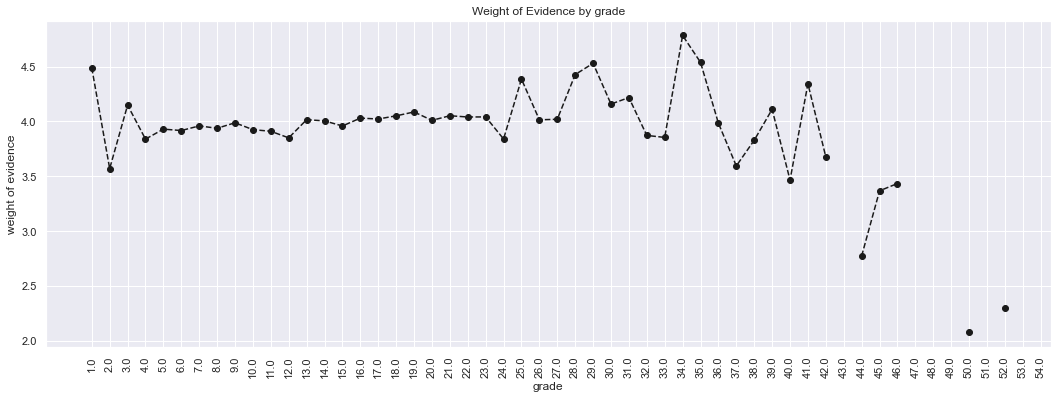

In [168]:
plot_by_woe(df_temp,90)

In [169]:
df_inputs_prepr['open_acc:>=0']=np.where((df_inputs_prepr['open_acc']>= 0.0),1,0)
df_inputs_prepr['open_acc:0-1']=np.where((df_inputs_prepr['open_acc']>0.0)&(df_inputs_prepr['open_acc']<=1),1,0)
df_inputs_prepr['open_acc:1-4']=np.where((df_inputs_prepr['open_acc']>1)&(df_inputs_prepr['open_acc']<=4),1,0)
df_inputs_prepr['open_acc:4-28']=np.where((df_inputs_prepr['open_acc']>4)&(df_inputs_prepr['open_acc']<=28),1,0)
df_inputs_prepr['open_acc:28-35']=np.where((df_inputs_prepr['open_acc']>28)&(df_inputs_prepr['open_acc']<=35),1,0)
df_inputs_prepr['open_acc:35-45']=np.where((df_inputs_prepr['open_acc']>35)&(df_inputs_prepr['open_acc']<=45),1,0)
df_inputs_prepr['open_acc:<45']=np.where((df_inputs_prepr['open_acc']<=45),0,1)

In [170]:
df_inputs_prepr['pub_rec']=df_inputs_prepr['pub_rec'].astype(float)

In [171]:
df_temp=woe_continuous(df_inputs_prepr,'pub_rec',df_targets_prepr)
df_temp

/Users/sushmita/opt/anaconda3/lib/python3.8/site-packages/pandas/core/algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,346679,0.981594,0.823282,340298.0,6381.0,0.823482,0.015441,3.976497,NaN,NaN,0.924106
1,1.0,60215,0.979972,0.142997,59009.0,1206.0,0.142795,0.002918,3.890381,0.001622,0.086116,0.924106
2,2.0,9230,0.982124,0.021919,9065.0,165.0,0.021936,0.000399,4.006231,0.002152,0.115850,0.924106
3,3.0,2876,0.979833,0.006830,2818.0,58.0,0.006819,0.000140,3.883340,0.002290,0.122891,0.924106
4,4.0,1044,0.977011,0.002479,1020.0,24.0,0.002468,0.000058,3.749504,0.002822,0.133836,0.924106
5,5.0,481,0.979210,0.001142,471.0,10.0,0.001140,0.000024,3.852273,0.002198,0.102769,0.924106
6,6.0,249,0.983936,0.000591,245.0,4.0,0.000593,0.000010,4.114964,0.004726,0.262691,0.924106
7,7.0,108,1.000000,0.000256,108.0,0.0,0.000261,0.000000,inf,0.016064,inf,0.924106
8,8.0,84,1.000000,0.000199,84.0,0.0,0.000203,0.000000,inf,0.000000,NaN,0.924106
9,9.0,34,0.970588,0.000081,33.0,1.0,0.000080,0.000002,3.496508,0.029412,inf,0.924106


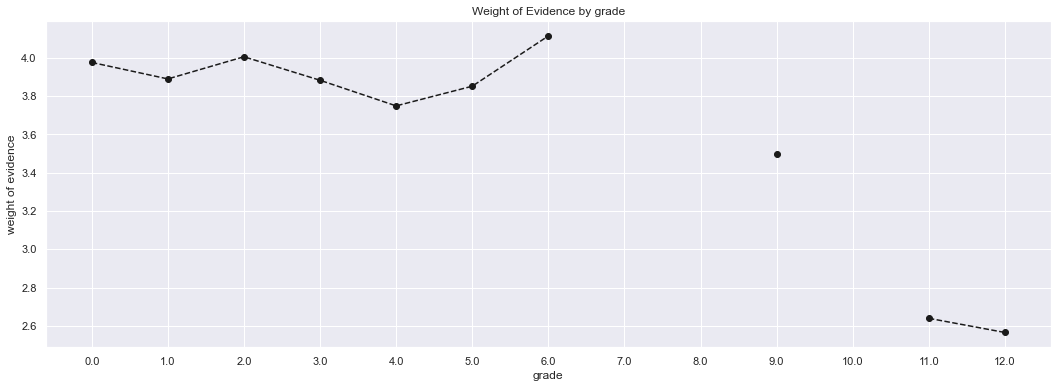

In [172]:
plot_by_woe(df_temp)

In [173]:
df_inputs_prepr['pub_rec:0-3']=np.where((df_inputs_prepr['pub_rec']>0)&(df_inputs_prepr['pub_rec']<=3),1,0)
df_inputs_prepr['pub_rec:3-6']=np.where((df_inputs_prepr['pub_rec']>3)&(df_inputs_prepr['pub_rec']<=6),1,0)
df_inputs_prepr['pub_rec:6-8']=np.where((df_inputs_prepr['pub_rec']>6)&(df_inputs_prepr['pub_rec']<=8),1,0)
df_inputs_prepr['pub_rec:8']=np.where((df_inputs_prepr['pub_rec']>8),0,1)

In [174]:
df_inputs_prepr['total_acc']=df_inputs_prepr['total_acc'].astype(float)

In [175]:
df_inputs_prepr['total_acc_fac']=pd.cut(df_inputs_prepr['total_acc'],50)

In [176]:
df_temp=woe_continuous(df_inputs_prepr,'total_acc_fac',df_targets_prepr)
df_temp

/Users/sushmita/opt/anaconda3/lib/python3.8/site-packages/pandas/core/algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(3.835, 7.3]",11333,0.976970,0.026913,11072.0,261.0,0.026793,0.000632,3.747654,NaN,NaN,0.924385
1,"(7.3, 10.6]",21005,0.979767,0.049882,20580.0,425.0,0.049801,0.001028,3.879986,0.002797,0.132332,0.924385
2,"(10.6, 13.9]",31446,0.979457,0.074677,30800.0,646.0,0.074532,0.001563,3.864470,0.000310,0.015515,0.924385
3,"(13.9, 17.2]",53180,0.980557,0.126290,52146.0,1034.0,0.126187,0.002502,3.920613,0.001100,0.056142,0.924385
4,"(17.2, 20.5]",44528,0.981742,0.105744,43715.0,813.0,0.105785,0.001967,3.984715,0.001185,0.064103,0.924385
5,"(20.5, 23.8]",44749,0.981676,0.106268,43929.0,820.0,0.106303,0.001984,3.981026,0.000066,0.003690,0.924385
6,"(23.8, 27.1]",55586,0.981182,0.132004,54540.0,1046.0,0.131980,0.002531,3.953961,0.000493,0.027065,0.924385
7,"(27.1, 30.4]",35493,0.982363,0.084288,34867.0,626.0,0.084374,0.001515,4.019946,0.001180,0.065985,0.924385
8,"(30.4, 33.7]",29540,0.982668,0.070151,29028.0,512.0,0.070244,0.001239,4.037692,0.000305,0.017746,0.924385
9,"(33.7, 37.0]",30463,0.982405,0.072343,29927.0,536.0,0.072420,0.001297,4.022382,0.000263,0.015309,0.924385


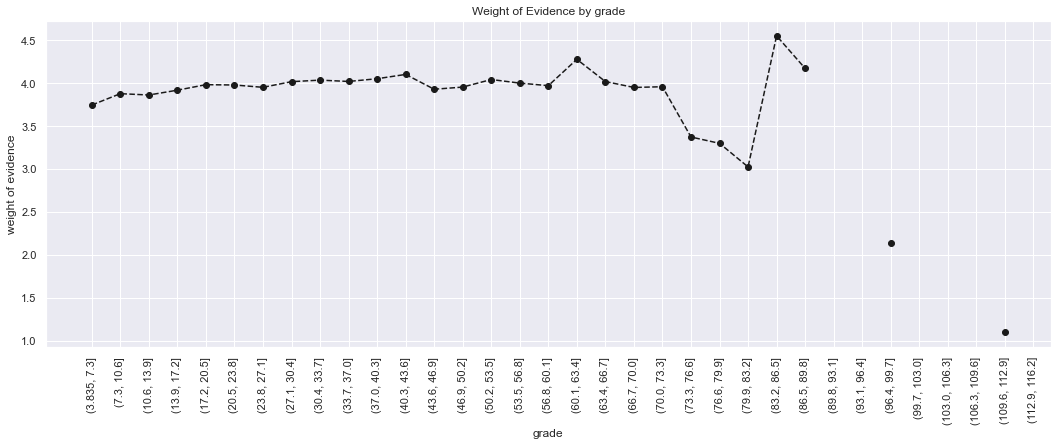

In [177]:
plot_by_woe(df_temp,90)

In [178]:
df_inputs_prepr['total_acc:<0']=np.where((df_inputs_prepr['total_acc']<0),0,1)
df_inputs_prepr['total_acc:0-4']=np.where((df_inputs_prepr['total_acc']>0)&(df_inputs_prepr['total_acc']<=4),1,0)
df_inputs_prepr['total_acc:4-62']=np.where((df_inputs_prepr['total_acc']>4)&(df_inputs_prepr['total_acc']<=62),1,0)
df_inputs_prepr['total_acc:62-72']=np.where((df_inputs_prepr['total_acc']>62)&(df_inputs_prepr['total_acc']<=72),1,0)
df_inputs_prepr['total_acc:72-85']=np.where((df_inputs_prepr['total_acc']>72)&(df_inputs_prepr['total_acc']<=85),0,1)
df_inputs_prepr['total_acc:>85']=np.where((df_inputs_prepr['total_acc']>85),0,1)

In [179]:
df_inputs_prepr['acc_now_delinq']=df_inputs_prepr['acc_now_delinq'].astype(float)

In [180]:
df_temp=woe_continuous(df_inputs_prepr,'acc_now_delinq',df_targets_prepr)
df_temp

/Users/sushmita/opt/anaconda3/lib/python3.8/site-packages/pandas/core/algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,418712,0.981424,0.994343,410934.0,7778.0,0.994412,0.018822,3.967133,NaN,NaN,0.924682
1,1.0,2243,0.971021,0.005327,2178.0,65.0,0.005271,0.000157,3.511775,0.010403,0.455358,0.924682
2,2.0,116,0.939655,0.000275,109.0,7.0,0.000264,0.000017,2.745438,0.031366,0.766337,0.924682
3,3.0,17,1.000000,0.000040,17.0,0.0,0.000041,0.000000,inf,0.060345,inf,0.924682
4,4.0,3,0.666667,0.000007,2.0,1.0,0.000005,0.000002,0.693147,0.333333,inf,0.924682
5,5.0,1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,0.333333,inf,0.924682
6,6.0,1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,0.000000,NaN,0.924682
7,14.0,1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,0.000000,NaN,0.924682


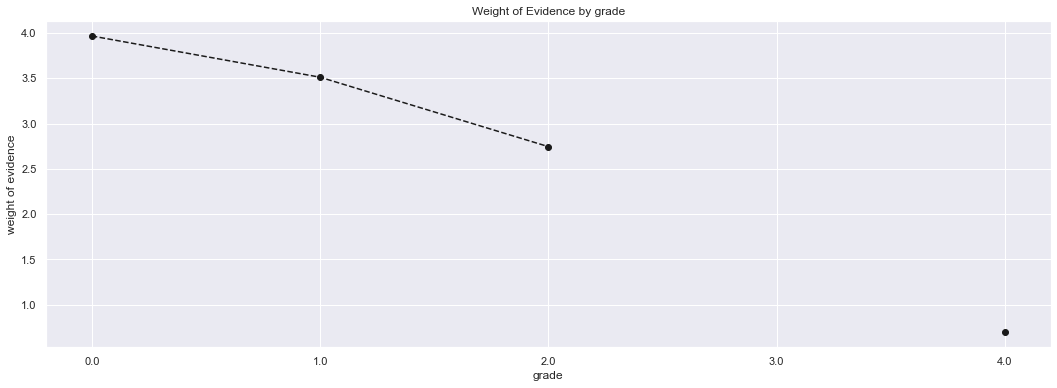

In [181]:
plot_by_woe(df_temp)

In [182]:
df_inputs_prepr['acc_now_delinq:<0']=np.where((df_inputs_prepr['acc_now_delinq']<0),0,1)
df_inputs_prepr['acc_now_delinq:0-1']=np.where((df_inputs_prepr['acc_now_delinq']>0)&(df_inputs_prepr['acc_now_delinq']<=1),1,0)
df_inputs_prepr['acc_now_delinq:1-2']=np.where((df_inputs_prepr['acc_now_delinq']>1)&(df_inputs_prepr['acc_now_delinq']<=2),1,0)
df_inputs_prepr['acc_now_delinq:2-3']=np.where((df_inputs_prepr['acc_now_delinq']>2)&(df_inputs_prepr['acc_now_delinq']<=3),1,0)
df_inputs_prepr['acc_now_delinq:3-5']=np.where((df_inputs_prepr['acc_now_delinq']>3)&(df_inputs_prepr['acc_now_delinq']<=5),0,1)
df_inputs_prepr['acc_now_delinq:>5']=np.where((df_inputs_prepr['acc_now_delinq']>5),0,1)

In [183]:
df_inputs_prepr_temp=df_inputs_prepr.loc[df_inputs_prepr['total_rev_hi_lim']<= 80000,:]

In [184]:
df_inputs_prepr['total_rev_hi_lim_factor']=pd.cut(df_inputs_prepr_temp['total_rev_hi_lim'],50)
df_temp=woe_continuous(df_inputs_prepr,'total_rev_hi_lim_factor',df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-80.0, 1600.0]",1195,0.969874,0.003031,1159.0,36.0,0.002997,0.000093,3.471794,NaN,NaN,0.923497
1,"(1600.0, 3200.0]",3819,0.969102,0.009687,3701.0,118.0,0.009572,0.000305,3.445674,0.000773,0.026120,0.923497
2,"(3200.0, 4800.0]",7464,0.972401,0.018933,7258.0,206.0,0.018771,0.000533,3.561983,0.003299,0.116310,0.923497
3,"(4800.0, 6400.0]",10760,0.973234,0.027294,10472.0,288.0,0.027083,0.000745,3.593500,0.000833,0.031516,0.923497
4,"(6400.0, 8000.0]",13996,0.976136,0.035502,13662.0,334.0,0.035333,0.000864,3.711233,0.002902,0.117733,0.923497
5,"(8000.0, 9600.0]",15630,0.974152,0.039647,15226.0,404.0,0.039378,0.001045,3.629345,0.001984,0.081888,0.923497
6,"(9600.0, 11200.0]",17095,0.976426,0.043363,16692.0,403.0,0.043169,0.001042,3.723748,0.002274,0.094403,0.923497
7,"(11200.0, 12800.0]",18035,0.978819,0.045747,17653.0,382.0,0.045654,0.000988,3.833240,0.002393,0.109492,0.923497
8,"(12800.0, 14400.0]",18304,0.977218,0.046430,17887.0,417.0,0.046260,0.001078,3.758743,0.001601,0.074497,0.923497
9,"(14400.0, 16000.0]",18325,0.980082,0.046483,17960.0,365.0,0.046448,0.000944,3.896005,0.002864,0.137262,0.923497


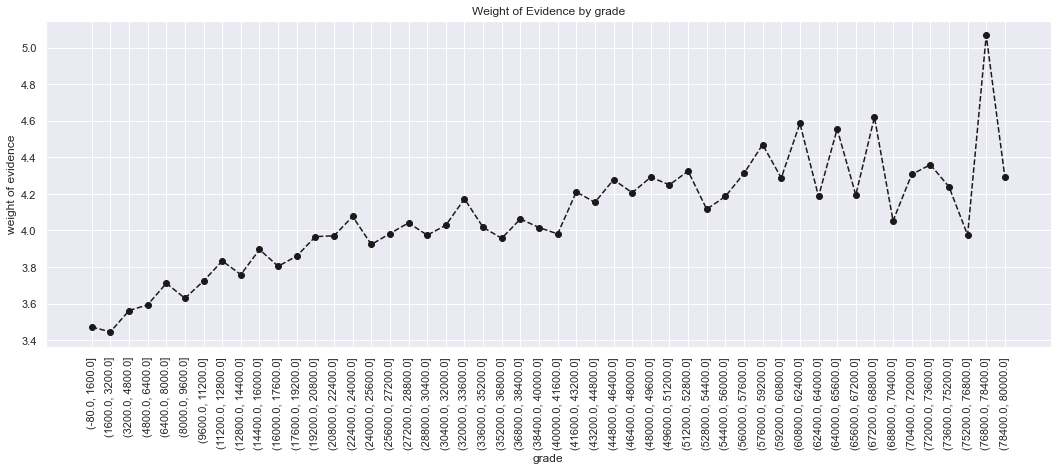

In [185]:
plot_by_woe(df_temp,90)

In [186]:
df_inputs_prepr['total_rev_hi_lim:<=5k']=np.where((df_inputs_prepr['total_rev_hi_lim']<= 5000),1,0)
df_inputs_prepr['total_rev_hi_lim:5k_10k']=np.where((df_inputs_prepr['total_rev_hi_lim']> 5000) & (df_inputs_prepr['total_rev_hi_lim']<= 10000),1,0)
df_inputs_prepr['total_rev_hi_lim:10k_20k']=np.where((df_inputs_prepr['total_rev_hi_lim']> 10000) & (df_inputs_prepr['total_rev_hi_lim']<= 20000),1,0)
df_inputs_prepr['total_rev_hi_lim:20k_30k']=np.where((df_inputs_prepr['total_rev_hi_lim']> 20000) & (df_inputs_prepr['total_rev_hi_lim']<= 30000),1,0)
df_inputs_prepr['total_rev_hi_lim:30k_40k']=np.where((df_inputs_prepr['total_rev_hi_lim']> 30000) & (df_inputs_prepr['total_rev_hi_lim']<= 40000),1,0)
df_inputs_prepr['total_rev_hi_lim:40k_50k']=np.where((df_inputs_prepr['total_rev_hi_lim']> 40000) & (df_inputs_prepr['total_rev_hi_lim']<= 50000),1,0)
df_inputs_prepr['total_rev_hi_lim:50k_65k']=np.where((df_inputs_prepr['total_rev_hi_lim']> 50000) & (df_inputs_prepr['total_rev_hi_lim']<= 65000),1,0)
df_inputs_prepr['total_rev_hi_lim:65k_80k']=np.where((df_inputs_prepr['total_rev_hi_lim']> 65000) & (df_inputs_prepr['total_rev_hi_lim']<= 80000),1,0)
df_inputs_prepr['total_rev_hi_lim:>80k']=np.where((df_inputs_prepr['total_rev_hi_lim']> 80000),1,0)


In [187]:
df_inputs_prepr['annual_inc_factor']=pd.cut(df_inputs_prepr['annual_inc'],100)
df_temp=woe_continuous(df_inputs_prepr,'annual_inc_factor',df_targets_prepr)
df_temp

/Users/sushmita/opt/anaconda3/lib/python3.8/site-packages/pandas/core/algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-9500.0, 95000.0]",325648,0.980203,0.773338,319201.0,6447.0,0.772429,0.015601,3.902206,NaN,NaN,0.923824
1,"(95000.0, 190000.0]",84045,0.985032,0.199587,82787.0,1258.0,0.200335,0.003044,4.186748,0.004829,0.284542,0.923824
2,"(190000.0, 285000.0]",8186,0.986196,0.019440,8073.0,113.0,0.019536,0.000273,4.268893,0.001164,0.082145,0.923824
3,"(285000.0, 380000.0]",1821,0.988468,0.004324,1800.0,21.0,0.004356,0.000051,4.451020,0.002272,0.182127,0.923824
4,"(380000.0, 475000.0]",652,0.990798,0.001548,646.0,6.0,0.001563,0.000015,4.679040,0.002330,0.228021,0.923824
5,"(475000.0, 570000.0]",291,0.989691,0.000691,288.0,3.0,0.000697,0.000007,4.564348,0.001107,0.114692,0.923824
6,"(570000.0, 665000.0]",165,1.000000,0.000392,165.0,0.0,0.000399,0.000000,inf,0.010309,inf,0.923824
7,"(665000.0, 760000.0]",92,1.000000,0.000218,92.0,0.0,0.000223,0.000000,inf,0.000000,NaN,0.923824
8,"(760000.0, 855000.0]",46,1.000000,0.000109,46.0,0.0,0.000111,0.000000,inf,0.000000,NaN,0.923824
9,"(855000.0, 950000.0]",24,1.000000,0.000057,24.0,0.0,0.000058,0.000000,inf,0.000000,NaN,0.923824


In [188]:
df_inputs_prepr_temp=df_inputs_prepr.loc[df_inputs_prepr['annual_inc']<= 140000,:]

In [189]:
df_inputs_prepr_temp['annual_inc_factor']=pd.cut(df_inputs_prepr_temp['annual_inc'],50)
df_temp=woe_continuous(df_inputs_prepr_temp,'annual_inc_factor',df_targets_prepr)
df_temp

<ipython-input-189-8697981dcea6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['annual_inc_factor']=pd.cut(df_inputs_prepr_temp['annual_inc'],50)


,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-140.0, 2800.0]",4,1.000000,0.000010,4.0,0.0,0.000010,0.000000,inf,NaN,NaN,0.924025
1,"(2800.0, 5600.0]",12,0.916667,0.000031,11.0,1.0,0.000029,0.000003,2.397895,0.083333,inf,0.924025
2,"(5600.0, 8400.0]",55,0.981818,0.000141,54.0,1.0,0.000141,0.000003,3.988984,0.065152,1.591089,0.924025
3,"(8400.0, 11200.0]",429,0.965035,0.001097,414.0,15.0,0.001079,0.000039,3.317816,0.016783,0.671168,0.924025
4,"(11200.0, 14000.0]",873,0.977090,0.002233,853.0,20.0,0.002224,0.000052,3.753027,0.012056,0.435212,0.924025
5,"(14000.0, 16800.0]",1339,0.973114,0.003425,1303.0,36.0,0.003397,0.000094,3.588906,0.003976,0.164122,0.924025
6,"(16800.0, 19600.0]",1808,0.966814,0.004624,1748.0,60.0,0.004558,0.000156,3.371883,0.006300,0.217023,0.924025
7,"(19600.0, 22400.0]",3823,0.972273,0.009778,3717.0,106.0,0.009691,0.000276,3.557233,0.005459,0.185350,0.924025
8,"(22400.0, 25200.0]",6445,0.973933,0.016485,6277.0,168.0,0.016366,0.000438,3.620683,0.001660,0.063450,0.924025
9,"(25200.0, 28000.0]",5904,0.977134,0.015101,5769.0,135.0,0.015041,0.000352,3.754979,0.003201,0.134296,0.924025


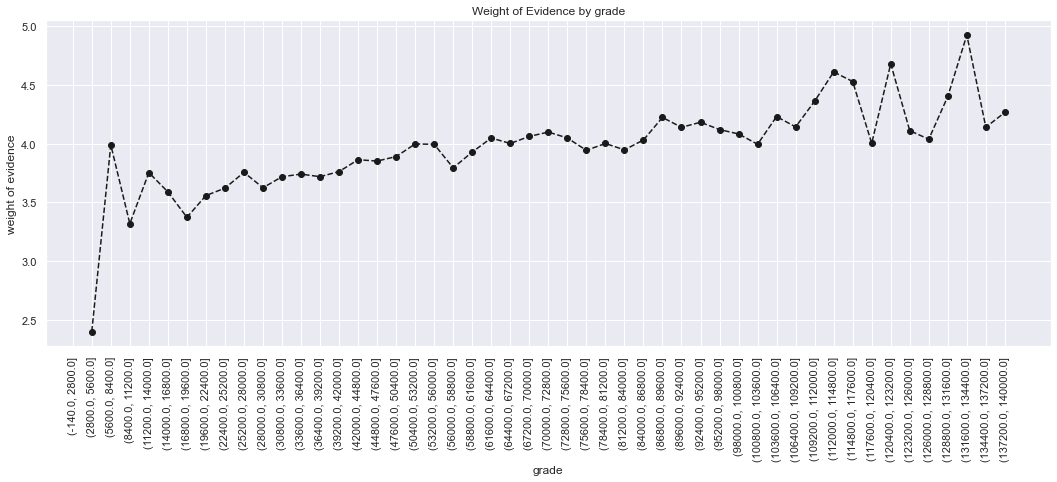

In [190]:
plot_by_woe(df_temp,90)

In [191]:
df_inputs_prepr['annual_inc:<20k']=np.where((df_inputs_prepr['annual_inc']<= 20000),1,0)
df_inputs_prepr['annual_inc:20k-30k']=np.where((df_inputs_prepr['annual_inc']> 20000) & (df_inputs_prepr['annual_inc']<= 30000),1,0)
df_inputs_prepr['annual_inc:30k-40k']=np.where((df_inputs_prepr['annual_inc']> 30000) & (df_inputs_prepr['annual_inc']<= 40000),1,0)
df_inputs_prepr['annual_inc:40k-50k']=np.where((df_inputs_prepr['annual_inc']> 40000) & (df_inputs_prepr['annual_inc']<= 50000),1,0)
df_inputs_prepr['annual_inc:50k-60k']=np.where((df_inputs_prepr['annual_inc']> 50000) & (df_inputs_prepr['annual_inc']<= 60000),1,0)
df_inputs_prepr['annual_inc:60k-70k']=np.where((df_inputs_prepr['annual_inc']> 60000) & (df_inputs_prepr['annual_inc']<= 70000),1,0)
df_inputs_prepr['annual_inc:70k-80k']=np.where((df_inputs_prepr['annual_inc']> 70000) & (df_inputs_prepr['annual_inc']<= 80000),1,0)
df_inputs_prepr['annual_inc:80k-90k']=np.where((df_inputs_prepr['annual_inc']> 80000) & (df_inputs_prepr['annual_inc']<= 90000),1,0)
df_inputs_prepr['annual_inc:90k-100k']=np.where((df_inputs_prepr['annual_inc']> 90000) & (df_inputs_prepr['annual_inc']<= 100000),1,0)
df_inputs_prepr['annual_inc:100k-120k']=np.where((df_inputs_prepr['annual_inc']> 100000) & (df_inputs_prepr['annual_inc']<= 120000),1,0)
df_inputs_prepr['annual_inc:120k-140k']=np.where((df_inputs_prepr['annual_inc']> 120000) & (df_inputs_prepr['annual_inc']<= 140000),1,0)
df_inputs_prepr['annual_inc:>140k']=np.where((df_inputs_prepr['annual_inc']> 140000),1,0)

In [192]:
df_inputs_prepr_temp=df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor']=pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'],50)
df_temp=woe_continuous(df_inputs_prepr_temp,'mths_since_last_delinq_factor',df_targets_prepr)
df_temp

<ipython-input-192-b654f83240da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_delinq_factor']=pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'],50)
/Users/sushmita/opt/anaconda3/lib/python3.8/site-packages/pandas/core/algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.176, 3.52]",7261,0.973833,0.033440,7071.0,190.0,0.033183,0.000892,3.616733,NaN,NaN,0.924428
1,"(3.52, 7.04]",15763,0.978367,0.072596,15422.0,341.0,0.072372,0.001600,3.811668,0.004534,0.194935,0.924428
2,"(7.04, 10.56]",12365,0.980348,0.056947,12122.0,243.0,0.056886,0.001140,3.909716,0.001981,0.098048,0.924428
3,"(10.56, 14.08]",16125,0.979721,0.074263,15798.0,327.0,0.074136,0.001535,3.877678,0.000627,0.032037,0.924428
4,"(14.08, 17.6]",11384,0.976985,0.052429,11122.0,262.0,0.052193,0.001230,3.748336,0.002736,0.129343,0.924428
5,"(17.6, 21.12]",14291,0.983626,0.065817,14057.0,234.0,0.065966,0.001098,4.095555,0.006641,0.347219,0.924428
6,"(21.12, 24.64]",10544,0.982170,0.048560,10356.0,188.0,0.048598,0.000882,4.008879,0.001456,0.086675,0.924428
7,"(24.64, 28.16]",13761,0.981760,0.063376,13510.0,251.0,0.063399,0.001178,3.985732,0.000410,0.023147,0.924428
8,"(28.16, 31.68]",9867,0.985001,0.045442,9719.0,148.0,0.045609,0.000695,4.184626,0.003240,0.198893,0.924428
9,"(31.68, 35.2]",12583,0.985218,0.057951,12397.0,186.0,0.058176,0.000873,4.199463,0.000218,0.014837,0.924428


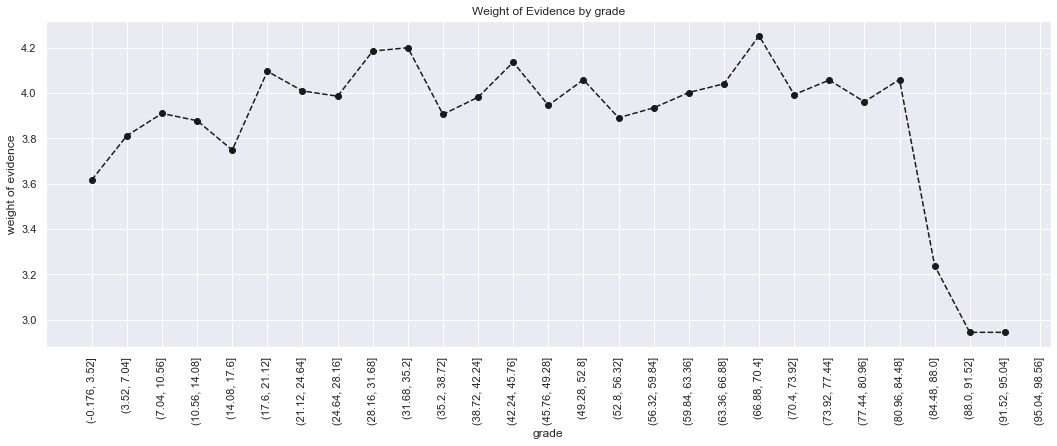

In [193]:
plot_by_woe(df_temp,90)

In [194]:
df_inputs_prepr['mths_since_last_delinq:Missing']=np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()),1,0)
df_inputs_prepr['mths_since_last_delinq:0-3']=np.where((df_inputs_prepr['mths_since_last_delinq']>=0)&(df_inputs_prepr['mths_since_last_delinq']<=3),1,0)
df_inputs_prepr['mths_since_last_delinq:4-30']=np.where((df_inputs_prepr['mths_since_last_delinq']>=4)&(df_inputs_prepr['mths_since_last_delinq']<=30),1,0)
df_inputs_prepr['mths_since_last_delinq:31-56']=np.where((df_inputs_prepr['mths_since_last_delinq']>=31)&(df_inputs_prepr['mths_since_last_delinq']<=56),1,0)
df_inputs_prepr['mths_since_last_delinq:>=57']=np.where((df_inputs_prepr['mths_since_last_delinq']>=57),1,0)

In [195]:
df_inputs_prepr['dti_factor']=pd.cut(df_inputs_prepr['dti'],50)

In [196]:
df_temp=woe_continuous(df_inputs_prepr,'dti_factor',df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-9.999, 199.98]",421089,0.981355,0.999988,413238.0,7851.0,0.999988,0.018999,3.963383,NaN,NaN,0.92469
1,"(199.98, 399.96]",1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,0.018645,inf,0.92469
2,"(399.96, 599.94]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.92469
3,"(599.94, 799.92]",1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,NaN,NaN,0.92469
4,"(799.92, 999.9]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.92469
5,"(999.9, 1199.88]",1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,NaN,NaN,0.92469
6,"(1199.88, 1399.86]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.92469
7,"(1399.86, 1599.84]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.92469
8,"(1599.84, 1799.82]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.92469
9,"(1799.82, 1999.8]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.92469


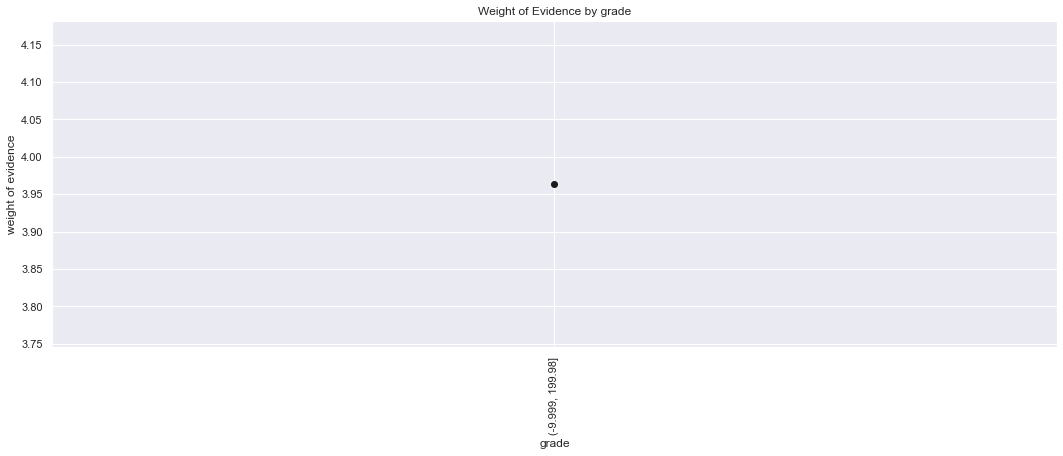

In [197]:
plot_by_woe(df_temp,90)

In [198]:
df_inputs_prepr['dti:<5']=np.where((df_inputs_prepr['dti']<= 5),1,0)
df_inputs_prepr['dti:5-10']=np.where((df_inputs_prepr['dti']> 5) & (df_inputs_prepr['dti']<= 10),1,0)
df_inputs_prepr['dti:10-15']=np.where((df_inputs_prepr['dti']> 10) & (df_inputs_prepr['dti']<= 15),1,0)
df_inputs_prepr['dti:15-20']=np.where((df_inputs_prepr['dti']> 15) & (df_inputs_prepr['dti']<= 20),1,0)
df_inputs_prepr['dti:20-25']=np.where((df_inputs_prepr['dti']> 20) & (df_inputs_prepr['dti']<= 25),1,0)
df_inputs_prepr['dti:25-30']=np.where((df_inputs_prepr['dti']> 25) & (df_inputs_prepr['dti']<= 30),1,0)
df_inputs_prepr['dti:30-35']=np.where((df_inputs_prepr['dti']> 30) & (df_inputs_prepr['dti']<= 35),1,0)
df_inputs_prepr['dti:35-40']=np.where((df_inputs_prepr['dti']> 35) & (df_inputs_prepr['dti']<= 40),1,0)
df_inputs_prepr['dti:>40']=np.where((df_inputs_prepr['dti']> 40),1,0)

In [199]:
df_inputs_prepr_temp=df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]
df_inputs_prepr_temp['mths_since_last_record']=pd.cut(df_inputs_prepr_temp['mths_since_last_record'],50)


<ipython-input-199-00b09418d593>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_record']=pd.cut(df_inputs_prepr_temp['mths_since_last_record'],50)


In [200]:
df_temp=woe_continuous(df_inputs_prepr_temp,'mths_since_last_record',df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.12, 2.4]",87,0.965517,0.001169,84.0,3.0,0.001152,0.000041,3.332205,NaN,NaN,0.921939
1,"(2.4, 4.8]",161,0.968944,0.002164,156.0,5.0,0.002139,0.000069,3.440418,0.003427,0.108214,0.921939
2,"(4.8, 7.2]",344,0.976744,0.004623,336.0,8.0,0.004606,0.000110,3.737670,0.007800,0.297252,0.921939
3,"(7.2, 9.6]",291,0.982818,0.003911,286.0,5.0,0.003921,0.000069,4.046554,0.006074,0.308884,0.921939
4,"(9.6, 12.0]",537,0.970205,0.007216,521.0,16.0,0.007142,0.000219,3.483161,0.012613,0.563393,0.921939
5,"(12.0, 14.4]",404,0.985149,0.005429,398.0,6.0,0.005456,0.000082,4.194693,0.014944,0.711531,0.921939
6,"(14.4, 16.8]",410,0.980488,0.005510,402.0,8.0,0.005511,0.000110,3.917011,0.004661,0.277682,0.921939
7,"(16.8, 19.2]",693,0.987013,0.009313,684.0,9.0,0.009377,0.000123,4.330733,0.006525,0.413723,0.921939
8,"(19.2, 21.6]",521,0.986564,0.007001,514.0,7.0,0.007046,0.000096,4.296313,0.000449,0.034420,0.921939
9,"(21.6, 24.0]",825,0.979394,0.011086,808.0,17.0,0.011077,0.000233,3.861349,0.007170,0.434964,0.921939


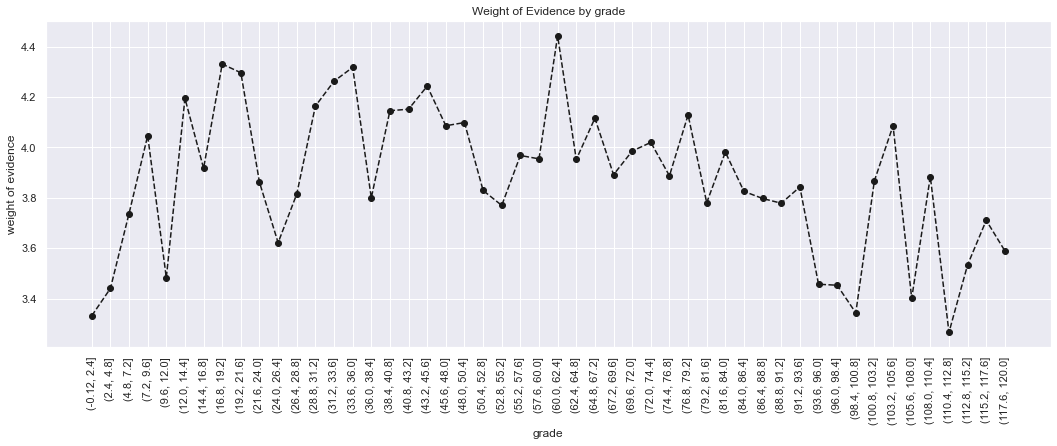

In [201]:
plot_by_woe(df_temp,90)

In [202]:
df_inputs_prepr['mths_since_last_record:Missing']=np.where((df_inputs_prepr['mths_since_last_record'].isnull()),1,0)
df_inputs_prepr['mths_since_last_record:0-90']=np.where((df_inputs_prepr['mths_since_last_record']>=0)&(df_inputs_prepr['mths_since_last_record']<=90),1,0)
df_inputs_prepr['mths_since_last_record:90-120']=np.where((df_inputs_prepr['mths_since_last_record']>=90)&(df_inputs_prepr['mths_since_last_record']<=120),1,0)
df_inputs_prepr['mths_since_last_record:120-127']=np.where((df_inputs_prepr['mths_since_last_record']>=120)&(df_inputs_prepr['mths_since_last_record']<=127),1,0)
df_inputs_prepr['mths_since_last_record:>=127']=np.where((df_inputs_prepr['mths_since_last_record']>=127),1,0)

In [203]:
#loan_data_inputs_train= df_inputs_prepr
loan_data_inputs_2015 = df_inputs_prepr


In [204]:
loan_data_targets_2015 = df_targets_prepr

In [205]:
loan_data_inputs_2015.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

In [206]:
loan_data_inputs_2015.shape

(421094, 334)

In [207]:
loan_data_targets_2015.shape

(421094,)

In [208]:
loan_data_inputs_2015.to_csv('loan_data_inputs_2015.csv')
loan_data_targets_2015.to_csv('loan_data_targets_2015.csv')

In [209]:
inputs_train_with_ref_category = pd.read_csv('inputs_train_with_ref_cat.csv',index_col = 0)


In [210]:
feature_selection=['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NC_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Verified',
'verification_status:Source Verified grade',
'verification_status:Not Verified',
    'purpose:educ_sm_b_wedd_ren_en_mov_house',
    'purpose:small_business',
    'purpose:educational',
    'purpose:renewable_energy',
    'purpose:moving',
    'purpose:house',
    'purpose:other',
    'purpose:medical',
    'purpose:wedding',
    'purpose:vacation',
    'purpose:debt_consolidation',
    'purpose:home_improvement',
    'purpose:major_purchase',
    'purpose:car',
    'purpose:credit_card',
    'initial_list_status:f',
    'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issued_date:<38',
'mths_since_issued_date:38-39',
'mths_since_issued_date:40-41',
'mths_since_issued_date:42-48',
'mths_since_issued_date:49-52',
'mths_since_issued_date:53-64',
'mths_since_issued_date:65-84',
'mths_since_issued_date:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:20.281',
    'mths_since_earliest_cr_line:<140',
    'mths_since_earliest_cr_line:140-239',
    'mths_since_earliest_cr_line:240-339',
    'mths_since_earliest_cr_line:340-439',
    'mths_since_earliest_cr_line:440-539',
    'mths_since_earliest_cr_line:540-600',
    'mths_since_earliest_cr_line:>600',
    'delinq_2yrs:0',
    'delinq_2yrs:0-3',
    'delinq_2yrs:3-7',
    'delinq_2yrs:7-9',
    'delinq_2yrs:9-11',
    'delinq_2yrs:11-12',
    'delinq_2yrs:12-18',
    'delinq_2yrs:>18',
    'inq_last_6mths:0',
    'inq_last_6mths:0-3',
    'inq_last_6mths:3-7',
    'inq_last_6mths:7-9',
    'inq_last_6mths:9-11',
    'inq_last_6mths:11-12',
    'inq_last_6mths:12-18',
    'inq_last_6mths:18',
    'open_acc:>=0',
    'open_acc:0-1',
    'open_acc:1-4',
    'open_acc:4-28',
    'open_acc:28-35',
    'open_acc:35-45',
    'open_acc:<45',
    'pub_rec:0-3',
    'pub_rec:3-6',
    'pub_rec:6-8',
    'pub_rec:8',
    'total_acc:<0',
    'total_acc:0-4',
    'total_acc:4-62',
    'total_acc:62-72',
    'total_acc:72-85',
    'total_acc:>85',
    'acc_now_delinq:<0',
    'acc_now_delinq:0-1',
    'acc_now_delinq:1-2',
    'acc_now_delinq:2-3',
    'acc_now_delinq:3-5',
      'acc_now_delinq:>5',             
'annual_inc:<20k',
'annual_inc:20k-30k',
'annual_inc:30k-40k',
'annual_inc:40k-50k',
'annual_inc:50k-60k',
'annual_inc:60k-70k',
'annual_inc:70k-80k',
'annual_inc:80k-90k',
'annual_inc:90k-100k',
'annual_inc:100k-120k',
'annual_inc:120k-140k',
'annual_inc:>140k',
'total_rev_hi_lim:<=5k',
'total_rev_hi_lim:5k_10k',
'total_rev_hi_lim:10k_20k',
'total_rev_hi_lim:20k_30k',
'total_rev_hi_lim:30k_40k',
'total_rev_hi_lim:40k_50k',
'total_rev_hi_lim:50k_65k',
'total_rev_hi_lim:65k_80k',
'total_rev_hi_lim:>80k',
'dti:<5',
'dti:5-10',
'dti:10-15',
'dti:15-20',
'dti:20-25',
'dti:25-30',
'dti:30-35',
'dti:35-40',
'dti:>40',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-90',
'mths_since_last_record:90-120',
'mths_since_last_record:120-127',
'mths_since_last_record:>=127']

In [211]:
inputs_2015_with_ref_category = loan_data_inputs_2015.reindex(columns=feature_selection)

In [212]:
inputs_train_with_ref_category.shape

(93257, 149)

In [213]:
inputs_2015_with_ref_category.shape


(421094, 148)

In [214]:
df_scorecard = pd.read_csv('df_scorecard.csv',index_col=0)

In [215]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculations,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-0.024305,NaN,Intercept,-2.257837,408.117207,408.0,-0.117207,408.0
1,1,grade:A,2.031313,0.000000e+00,grade,188.703420,138.382508,138.0,-0.382508,138.0
2,2,grade:B,1.124506,5.069716e-96,grade,104.463541,76.606597,77.0,0.393403,77.0
3,3,grade:C,0.865366,8.184744e-61,grade,80.390071,58.952719,59.0,0.047281,59.0
4,4,grade:D,0.686266,1.909592e-40,grade,63.752227,46.751633,47.0,0.248367,47.0
...,...,...,...,...,...,...,...,...,...,...
143,17,total_rev_hi_lim:<=5k,0.000000,NaN,total_rev_hi_lim,0.000000,0.000000,0.0,0.000000,0.0
144,18,annual_inc:<20k,0.000000,NaN,annual_inc,0.000000,0.000000,0.0,0.000000,0.0
145,19,dti:>40,0.000000,NaN,dti,0.000000,0.000000,0.0,0.000000,0.0
146,20,mths_since_last_delinq:0-3,0.000000,NaN,mths_since_last_delinq,0.000000,0.000000,0.0,0.000000,0.0


In [216]:
inputs_train_with_ref_cat_w_intercept = inputs_train_with_ref_category
#inputs_train_with_ref_cat_w_intercept.insert(0,'Intercept', 1)
inputs_train_with_ref_cat_w_intercept = inputs_train_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]
inputs_train_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:OK_TN_MO_LA_MD_NC,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Source Verified grade,verification_status:Not Verified,purpose:small_business,purpose:educational,purpose:renewable_energy,purpose:moving,purpose:house,purpose:other,purpose:medical,purpose:wedding,purpose:vacation,purpose:debt_consolidation,purpose:home_improvement,purpose:major_purchase,purpose:car,purpose:credit_card,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issued_date:<38,mths_since_issued_date:38-39,mths_since_issued_date:40-41,mths_since_issued_date:42-48,mths_since_issued_date:49-52,mths_since_issued_date:53-64,mths_since_issued_date:65-84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,mths_since_earliest_cr_line:140-239,mths_since_earliest_cr_line:240-339,mths_since_earliest_cr_line:340-439,mths_since_earliest_cr_line:440-539,mths_since_earliest_cr_line:540-600,mths_since_earliest_cr_line:>600,delinq_2yrs:0,delinq_2yrs:0-3,delinq_2yrs:3-7,delinq_2yrs:7-9,delinq_2yrs:9-11,delinq_2yrs:11-12,delinq_2yrs:12-18,inq_last_6mths:0,inq_last_6mths:0-3,inq_last_6mths:3-7,inq_last_6mths:9-11,inq_last_6mths:11-12,inq_last_6mths:12-18,inq_last_6mths:18,open_acc:0-1,open_acc:1-4,open_acc:4-28,open_acc:28-35,open_acc:35-45,open_acc:<45,pub_rec:3-6,pub_rec:6-8,pub_rec:8,total_acc:<0,total_acc:0-4,total_acc:4-62,total_acc:62-72,total_acc:72-85,acc_now_delinq:0-1,acc_now_delinq:1-2,acc_now_delinq:2-3,acc_now_delinq:3-5,annual_inc:20k-30k,annual_inc:30k-40k,annual_inc:40k-50k,annual_inc:50k-60k,annual_inc:60k-70k,annual_inc:70k-80k,annual_inc:80k-90k,annual_inc:90k-100k,annual_inc:100k-120k,annual_inc:120k-140k,annual_inc:>140k,total_rev_hi_lim:5k_10k,total_rev_hi_lim:10k_20k,total_rev_hi_lim:20k_30k,total_rev_hi_lim:30k_40k,total_rev_hi_lim:40k_50k,total_rev_hi_lim:50k_65k,total_rev_hi_lim:65k_80k,total_rev_hi_lim:>80k,dti:<5,dti:5-10,dti:10-15,dti:15-20,dti:20-25,dti:25-30,dti:30-35,dti:35-40,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:0-90,mths_since_last_record:90-120,mths_since_last_record:120-127,mths_since_last_record:>=127,grade:G,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND_NE_IA_NC_FL_HI_AL,verification_status:Verified,purpose:educ_sm_b_wedd_ren_en_mov_house,initial_list_status:f,term:60,emp_length:0,mths_since_issued_date:>84,int_rate:20.281,mths_since_earliest_cr_line:<140,delinq_2yrs:>18,inq_last_6mths:7-9,open_acc:>=0,pub_rec:0-3,total_acc:>85,acc_now_delinq:0,total_rev_hi_lim:<=5k,annual_inc:<20k,dti:>40,mths_since_last_delinq:0-3,mths_since_last_record:Missing
362514,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,1,NaN,NaN,NaN,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,1,0,1,0,1,NaN,0,0,0,0,1
288564,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,1,NaN,NaN,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,NaN,0,0,0,1,1
213591,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,1,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,1,0,1,0,1,NaN,0,0,0,0,1
263083,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,

In [217]:
inputs_2015_with_ref_cat_w_intercept.head()

NameError: name 'inputs_2015_with_ref_cat_w_intercept' is not defined

In [ ]:
df_scorecard['Feature name'] = df_scorecard['Feature name'].replace(['acc_now_delinq:0'],'acc_now_delinq:<0')

In [ ]:
df_scorecard['Feature name'].values

In [ ]:
inputs_2015_with_ref_cat_w_intercept = inputs_2015_with_ref_category
#inputs_2015_with_ref_cat_w_intercept.insert(0,'Intercept', 1)
inputs_2015_with_ref_cat_w_intercept = inputs_2015_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]
inputs_2015_with_ref_cat_w_intercept.head()

In [ ]:
scorecard_scores = df_scorecard['Score - Final']
scorecard_scores = scorecard_scores.values.reshape(148, 1)
scorecard_scores.shape

In [ ]:
df_scorecard

In [ ]:
scorecard_scores

In [ ]:
y_scores_train = inputs_train_with_ref_cat_w_intercept.dot(scorecard_scores)
y_scores_train.head()

In [ ]:
y_scores_2015 = inputs_2015_with_ref_cat_w_intercept.dot(scorecard_scores)
y_scores_2015.head()

In [ ]:
inputs_2015_with_ref_cat_w_intercept.head()

In [ ]:
scorecard_scores

In [ ]:
inputs_train_with_ref_cat_w_intercept = pd.concat([inputs_train_with_ref_cat_w_intercept,y_scores_train], axis = 1)
inputs_2015_with_ref_cat_w_intercept = pd.concat([inputs_2015_with_ref_cat_w_intercept,y_scores_2015],axis = 1)

In [ ]:
inputs_train_with_ref_cat_w_intercept.columns.values[inputs_train_with_ref_cat_w_intercept.shape[1] - 1] = 'Score'
inputs_2015_with_ref_cat_w_intercept.columns.values[inputs_2015_with_ref_cat_w_intercept.shape[1] - 1] = 'Score'

In [ ]:
inputs_2015_with_ref_cat_w_intercept.head()

Population Stability Index: Calculation and Interpretation

In [ ]:
PSI_calc_train = inputs_train_with_ref_cat_w_intercept.sum() / inputs_train_with_ref_cat_w_intercept.shape[0]
PSI_calc_train

In [ ]:
PSI_calc_2015 = inputs_2015_with_ref_cat_w_intercept.sum() / inputs_2015_with_ref_cat_w_intercept.shape[0]
PSI_calc_2015

In [ ]:
PSI_calc = pd.concat([PSI_calc_train,PSI_calc_2015], axis = 1)

In [ ]:
PSI_calc = PSI_calc.reset_index()
PSI_calc['Original feature name'] = PSI_calc['index'].str.split(':').str[0]
PSI_calc.columns = ['index','Proportions_Train','Proportions_New','Original feature name']


In [ ]:
PSI_calc = PSI_calc[np.array(['index','Original feature name','Proportions_Train','Proportions_New'])]

In [ ]:
PSI_calc

In [ ]:
PSI_calc = PSI_calc[(PSI_calc['index']  != 'Intercept') & (PSI_calc['index'] != 'Score')]

In [ ]:
PSI_calc

In [ ]:
PSI_calc['Contribution'] = np.where((PSI_calc['Proportions_Train'] == 0) | (PSI_calc['Proportions_New'] == 0),0,
                            (PSI_calc['Proportions_New'] - PSI_calc['Proportions_Train'])* np.log(PSI_calc['Proportions_New'] /  PSI_calc['Proportions_Train']))

In [ ]:
PSI_calc

In [ ]:
PSI_calc.groupby('Original feature name')['Contribution'].sum()